# **MACHINE  LEARNING  FOUNDATION  PROJECT**

## PROJECT DESCRIPTION

### **AE CORP**

Fictional Retail bank and our client


They are going to float a stock trading facility for their existing customers.

The idea is to use data to classify whether a customer belongs to a high net worth or low net worth group.

They will have to incentivize their customers to adopt their offerings.

One way to incentivize is to offer discounts on the commission for trading transactions.

**Current Scenario**

The company rolled out this service to about 10,000+ of its customers and observed their trading behavior for 6 months and after that, they labeled them into two revenue grids 1 and 2.


## PROBLEM STATEMENT ##

#### The current process suffers from the following problems:

One issue is that only about 10% of the customers do enough trades for earnings after discounts to be profitable.
The company wants to figure out, which are those 10% customers so that it can selectively offer them a discount.

The marketing department has hired you as a data science consultant because they want to supplement their campaigns with a more proactive approach.

**Your Role**


- You are given datasets of past customers and their status (Revenue Grid 1 or 2).
- Your task is to build a classification model using the datasets.
- Because there was no machine learning model for this problem in the company, you don’t have a quantifiable win condition. You need to build the best possible model.

**Project Deliverables**


**Deliverable:** 
-Predict whether a customer belongs to a high net worth or low net worth group.
-Machine Learning Task: Classification
-Target Variable: Status (high net worth (1) / low net worth (2))
-Win Condition: N/A (best possible model)

**Evaluation Metric**
The model evaluation will be based on the F1 Score score.

### DATA DESCRIPTION ###

We are provided with a dataset containing all the necessary information about the customers like their occupation, family income, gender, region, balance transfer, children, etc.

Also included in the dataset is the column Revenue_Grid which classifies the customers into high net worth customers (1) and low net worth customers (2).

This is the data that we have to **predict for future customers.**


The dataset is divided into two parts: **Train**, and **Test** sets.

**Train Set:**

The train set contains **8124** rows and **32** columns.<BR>
The last column Revenue_Grid is the target variable.<BR>

**Test Set:**

The test set contains **2031** rows and **31** columns.<BR>
The test set doesn’t contain the **Revenue_Grid column**.<BR>
It needs to be **predicted** for the **test set**.


#### Dataset Feature Description

The Dataset contains the following columns:


|Column Name| Description|
|:----------|-----------:|
|REF_NO|Reference Number of the customer.|
|children|Number of children each customer has.|
|Age_band|Age Group to which the customer belongs.|
|status|Marital Status of the customer.|
|occupation|Job or profession of the customer.|
|occupation_partner|Job or profession of the customer's partner.|
|home_status|Home Status of the customers.|
|family_income|Income Range of the customer's family.|
|self_employed|Whether self-employed or not.|
|self_employed_partner|Whether the partner self-employed or not.|
|year_last_moved|Moving Year from the last location of the customer.|
|TVarea|Television Region of the customer.|
|post_code|Postal Code of the customer.|
|post_area|Postal Area of the customer.|
|Average_Credit_Card_Transaction|Average Credit Card Transaction per year by the customer.|
|Balance_Transfer|Transfer of the Balance in an account to another account by the customer.|
|Term_Deposit|Cash Investment Help at Financial Institute provided to the customer.|
|Life_Insurance|Basic Life Insurance Coverage of the customer.|
|Medical_Insurance|Medical Insurance Coverage of the customer.|
|Average_A/C_Balance|Average Balance in the account of the customer.|
|Personal_Loan|Amount of Personal Loan taken by the customer.|
|Investment_in_Mutual_Fund|Amount Invested in Mutual Funds by the customer.|
|Investment_Tax_Saving_Bond|Amount Invested in Tax Saving Bond by the customer.|
|Home_Loan|Amount of Home Loan taken by the customer.|
|Online_Purchase_Amount|Amount spent by the customer on online purchases.|
|gender|Gender of the customer.|
|region|Religion of the customer.|
|Investment_in_Commudity|Amount Invested in Commodity by the customer.|
|Investment_in_Equity|Amount Invested in Equity by the customer.|
|Investment_in_Derivative|Amount Invested in Derivatives by the customer.|
|Portfolio_Balance|Balanced Investment Strategy of the customer.|
|Revenue_Grid|Grid report of the customers.|


### IMPORTING LIBRARIES 

In [11]:

import pandas as pd                                             # Importing Pandas for Data Ananlysis and Manipulation                      
from pandas_profiling import ProfileReport                      # for generating profile report    
pd.set_option('display.max_columns', None)                      # Unfolding hidden features if the cardinality is high
pd.set_option('display.max_rows', None)                         # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                  # Removing restriction over chained assignments operations
import numpy as np                                              # For high-level mathmematical functions     
from scipy.stats import randint as sp_randint                   # For initiallizing Randon Integer   
import matplotlib.pyplot as plt                                 # For plotting graphs    
import seaborn as sns                                           # For interactive data vizualization    
%matplotlib inline                                              

import sklearn.metrics                                          # For assessing qualtiy of predections
from sklearn.preprocessing import StandardScaler                # To standardize features by removing the mean and scaling to unit variance.   
from sklearn.model_selection import RandomizedSearchCV          # For random combinations of the hyperparameters ,used to find the best solution for the built model.    
from sklearn.metrics import classification_report               # To generate classification report    
from sklearn.metrics import plot_confusion_matrix               # For plotting confusion matrix, to define the performance of classification algorithm   
#import pydotplus                                               # for generating pydot file 
from IPython.display import Image                               # For generating image using pydot file    

from sklearn.metrics import accuracy_score                      # For calcuating the accuracy of the model    
from sklearn.metrics import precision_score                     # For calculating the precision of the model    
from sklearn.metrics import recall_score                        # For calculating the recall of the model   
from sklearn.metrics import precision_recall_curve              # For precision and recall metric estimation
from sklearn.metrics import confusion_matrix                    # For defining performance of classification algorithm     
from sklearn.metrics import f1_score                            # For measuring a model's accuracy on dataset.    
from sklearn.metrics import roc_curve                           # For showing the performance of classification model at all classification thresholds.    
from sklearn.metrics import plot_roc_curve                      # For plotting ROC curve
from sklearn.model_selection import train_test_split            # For splitting the data into training and testing data set     
from sklearn.linear_model import LogisticRegression             # For implementing Logistic regression    
import warnings                                                 # For disabling warings    
warnings.filterwarnings("ignore")                                  





### DATA ACQUISITION

- We have 2 datasets, named as train set and test set. 
- The train data set consist of 8124 rows and 32 columns. 
- The test data set consist of 2031 rows and 31 coulmns, the revenue_grid column needs to be predicted for test data set. 

####  *Loading train and test data set.*  

In [12]:

test = pd.read_csv("/Users/sunnymallik/Downloads/Customer-classification/existing_base_test.csv")
train = pd.read_csv("/Users/sunnymallik/Downloads/Customer-classification/existing_base_train.csv")


In [13]:
# displays first five rows, easy to test if the data set has the right type of data
train.head()

,REF_NO,children,age_band,status,occupation,occupation_partner,home_status,family_income,self_employed,self_employed_partner,year_last_moved,TVarea,post_code,post_area,Average_Credit_Card_Transaction,Balance_Transfer,Term_Deposit,Life_Insurance,Medical_Insurance,Average_A/C_Balance,Personal_Loan,Investment_in_Mutual_Fund,Investment_Tax_Saving_Bond,Home_Loan,Online_Purchase_Amount,gender,region,Investment_in_Commudity,Investment_in_Equity,Investment_in_Derivative,Portfolio_Balance,Revenue_Grid
0,5466,2,31-35,Partner,Professional,Professional,Own Home,">=35,000",No,No,1981,Meridian,M51 0GU,M51,26.98,29.99,312.25,299.79,88.72,108.85,175.43,134.35,8.98,55.44,7.68,Female,North West,151.55,81.79,136.02,360.37,2
1,9091,Zero,45-50,Partner,Secretarial/Admin,Professional,Own Home,">=35,000",No,No,1997,Meridian,L40 2AG,L40,35.98,74.48,0.00,99.96,10.99,48.45,15.99,0.00,0.00,0.00,18.99,Female,North West,44.28,13.91,29.23,89.22,2
2,9744,1,36-40,Partner,Manual Worker,Manual Worker,Rent Privately,"<22,500, >=20,000",Yes,Yes,1996,HTV,TA19 9PT,TA19,0.00,24.46,0.00,18.44,0.00,0.00,0.02,10.46,0.00,0.00,0.00,Female,South West,8.58,1.75,4.82,14.50,2
3,10700,2,31-35,Partner,Manual Worker,Manual Worker,Own Home,"<25,000, >=22,500",No,No,1990,Scottish TV,FK2 9NG,FK2,44.99,0.00,0.00,0.00,29.99,0.00,0.00,0.00,0.00,0.00,0.00,Female,Scotland,15.00,0.00,5.00,68.98,2
4,1987,Zero,55-60,Partner,Housewife,Professional,Own Home,">=35,000",No,No,1989,Yorkshire,LS23 7DJ,LS23,0.00,0.00,0.00,0.00,0.00,0.00,0.00,9.98,0.00,0.00,0.00,Female,Unknown,0.00,1.66,1.66,1.88,2


In [14]:
test.head()

,REF_NO,children,age_band,status,occupation,occupation_partner,home_status,family_income,self_employed,self_employed_partner,year_last_moved,TVarea,post_code,post_area,Average_Credit_Card_Transaction,Balance_Transfer,Term_Deposit,Life_Insurance,Medical_Insurance,Average_A/C_Balance,Personal_Loan,Investment_in_Mutual_Fund,Investment_Tax_Saving_Bond,Home_Loan,Online_Purchase_Amount,gender,region,Investment_in_Commudity,Investment_in_Equity,Investment_in_Derivative,Portfolio_Balance
0,697,Zero,71+,Partner,Retired,Housewife,Own Home,"<12,500, >=10,000",No,No,1973,Meridian,BH21 2JQ,BH21,41.98,55.47,24.99,29.98,49.98,44.47,0.00,45.97,0.00,0.00,0.00,Male,South West,40.48,15.07,28.40,83.05
1,7897,Zero,31-35,Partner,Unknown,Business Manager,Own Home,">=35,000",No,No,1996,Anglia,CM6 3QS,CM6,0.00,0.00,0.00,99.91,35.42,29.49,170.31,133.88,27.45,13.47,57.46,Male,South East,27.07,72.01,82.74,235.29
2,4729,Zero,71+,Partner,Housewife,Retired,Own Home,"<15,000, >=12,500",No,No,1958,HTV,BA12 9JW,BA12,0.00,154.47,0.00,67.47,0.00,87.83,0.00,107.88,0.00,0.00,0.00,Female,South West,44.39,32.62,43.86,98.38
3,6914,1,22-25,Partner,Other,Other,Own Home,"<17,500, >=15,000",No,No,1993,Grampian,AB22 8SP,AB22,18.98,60.98,0.00,17.99,9.99,0.00,102.43,44.96,0.00,0.00,0.00,Female,Scotland,21.59,24.57,29.23,86.32
4,2795,Zero,65-70,Widowed,Retired,Unknown,Own Home,"< 4,000",No,No,1976,Meridian,PO37 6AD,PO37,0.00,144.90,0.00,123.38,0.00,32.98,0.00,33.96,6.99,17.93,5.45,Female,South East,53.66,16.22,32.89,102.99


In [16]:
# gives dimensions of the data
test.shape

(2031, 31)

In [17]:
train.shape

(8124, 32)

In [18]:
#checking missing values in train data set
any(train.isna().sum())

False

In [19]:
#checking missing values in test data set
any(test.isna().sum())

False

In [20]:
#checking duplicate values
any(train.duplicated())

False

In [21]:
#checking duplicate values
any(test.duplicated())

False

In [24]:
# Basic Statistical insight on the data set 
train.describe()


,REF_NO,year_last_moved,Average_Credit_Card_Transaction,Balance_Transfer,Term_Deposit,Life_Insurance,Medical_Insurance,Average_A/C_Balance,Personal_Loan,Investment_in_Mutual_Fund,Investment_Tax_Saving_Bond,Home_Loan,Online_Purchase_Amount,Investment_in_Commudity,Investment_in_Equity,Investment_in_Derivative,Portfolio_Balance,Revenue_Grid
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.00000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,5797.343304,1967.876908,23.251094,46.082922,27.284649,65.317939,18.826195,31.838023,25.41583,41.723628,6.057246,4.416914,19.198658,36.152749,21.442475,31.530652,89.353368,1.894141
std,3322.497568,182.563785,51.147496,79.084692,54.133537,95.762451,32.022332,45.249440,85.13015,64.416023,12.673374,9.945747,92.343126,42.474953,32.261660,39.480660,108.303538,0.307676
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-78.430000,1.000000
25%,2924.750000,1978.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,8.282500,4.660000,8.740000,26.277500,2.000000
50%,5811.500000,1988.000000,0.000000,17.485000,0.000000,31.475000,0.010000,14.980000,0.00000,23.480000,0.000000,0.000000,0.000000,23.590000,12.820000,21.140000,65.560000,2.000000
75%,8681.500000,1994.000000,23.480000,64.990000,34.490000,92.887500,26.970000,45.922500,20.82750,59.440000,5.490000,4.490000,7.480000,49.795000,27.972500,42.392500,123.970000,2.000000
max,11518.000000,1999.000000,662.260000,2951.760000,784.820000,2930.410000,591.040000,626.240000,4905.93000,2561.270000,156.870000,162.350000,4306.420000,1231.090000,1279.100000,1771.160000,4283.560000,2.000000


In [25]:
test.describe()

,REF_NO,year_last_moved,Average_Credit_Card_Transaction,Balance_Transfer,Term_Deposit,Life_Insurance,Medical_Insurance,Average_A/C_Balance,Personal_Loan,Investment_in_Mutual_Fund,Investment_Tax_Saving_Bond,Home_Loan,Online_Purchase_Amount,Investment_in_Commudity,Investment_in_Equity,Investment_in_Derivative,Portfolio_Balance
count,2031.000000,2031.000000,2031.000000,2031.00000,2031.000000,2031.000000,2031.000000,2031.000000,2031.000000,2031.000000,2031.000000,2031.000000,2031.000000,2031.000000,2031.000000,2031.000000,2031.000000
mean,5664.780896,1970.374200,24.204407,47.75711,28.760660,69.938897,20.405470,33.072733,28.366696,44.803978,6.331369,4.742354,19.019227,38.213437,22.723570,33.820625,94.887715
std,3332.892962,170.457726,49.760499,76.00507,53.219266,94.604936,34.094857,46.421372,80.744969,61.741147,13.456798,10.127166,78.066618,41.412048,30.364114,37.525384,102.915537
min,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-74.070000
25%,2816.500000,1979.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.195000,4.830000,8.830000,28.330000
50%,5575.000000,1988.000000,0.000000,19.47000,0.000000,34.490000,4.490000,17.970000,0.000000,23.980000,0.000000,0.000000,0.000000,25.590000,13.470000,22.560000,68.530000
75%,8572.500000,1994.000000,24.490000,69.71000,35.970000,100.680000,29.470000,48.950000,24.875000,63.930000,5.990000,4.990000,8.985000,54.215000,29.895000,46.210000,131.345000
max,11516.000000,1999.000000,390.880000,858.78000,531.800000,825.020000,296.010000,616.170000,1645.380000,561.540000,123.340000,122.670000,1407.450000,348.970000,434.150000,533.980000,1109.570000


### Observations 

- Both the data set does not have any missing value, or duplicate value.
- Most of the column have outliers as mean is very less than max.
- The data sets do have normal distribution.

### DATA INFORMATION 

 We will get an insight on the data and it's features.

In [26]:
#to get an insight we need to know the features of the data set
train.columns

Index(['REF_NO', 'children', 'age_band', 'status', 'occupation',
       'occupation_partner', 'home_status', 'family_income', 'self_employed',
       'self_employed_partner', 'year_last_moved', 'TVarea', 'post_code',
       'post_area', 'Average_Credit_Card_Transaction', 'Balance_Transfer',
       'Term_Deposit', 'Life_Insurance', 'Medical_Insurance',
       'Average_A/C_Balance', 'Personal_Loan', 'Investment_in_Mutual_Fund',
       'Investment_Tax_Saving_Bond', 'Home_Loan', 'Online_Purchase_Amount',
       'gender', 'region', 'Investment_in_Commudity', 'Investment_in_Equity',
       'Investment_in_Derivative', 'Portfolio_Balance', 'Revenue_Grid'],
      dtype='object')

In [27]:
#As we can see there are 32 coulmns in the data set, which are features of the data set. Now we need to know what type of features are present in the data set

   #As the data contains categorical and numerical data , we will be gathering information regarding the values of categorical and numerical data. 

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 32 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   REF_NO                           8124 non-null   int64  
 1   children                         8124 non-null   object 
 2   age_band                         8124 non-null   object 
 3   status                           8124 non-null   object 
 4   occupation                       8124 non-null   object 
 5   occupation_partner               8124 non-null   object 
 6   home_status                      8124 non-null   object 
 7   family_income                    8124 non-null   object 
 8   self_employed                    8124 non-null   object 
 9   self_employed_partner            8124 non-null   object 
 10  year_last_moved                  8124 non-null   int64  
 11  TVarea                           8124 non-null   object 
 12  post_code           

We can see the data has 14 categorical values and 3 numerical values with integer data type and 15 numerical values with float datatype.
Now we will get a list of variables as per their data type.


In [28]:
#categorical values 
cv = (train.dtypes == 'object')
object_cols = list(cv[cv].index)

print("Categorical variables:")
print(object_cols)


Categorical variables:
['children', 'age_band', 'status', 'occupation', 'occupation_partner', 'home_status', 'family_income', 'self_employed', 'self_employed_partner', 'TVarea', 'post_code', 'post_area', 'gender', 'region']


In [29]:
nvi = (train.dtypes == 'int64')
numeric_cols = list(nvi[nvi].index)

print("Integer values:")
print(numeric_cols)

Integer values:
['REF_NO', 'year_last_moved', 'Revenue_Grid']


In [30]:

nvf = (train.dtypes == 'float64')
numeric_cols = list(nvf[nvf].index)

print("Float values:")
print(numeric_cols)

Float values:
['Average_Credit_Card_Transaction', 'Balance_Transfer', 'Term_Deposit', 'Life_Insurance', 'Medical_Insurance', 'Average_A/C_Balance', 'Personal_Loan', 'Investment_in_Mutual_Fund', 'Investment_Tax_Saving_Bond', 'Home_Loan', 'Online_Purchase_Amount', 'Investment_in_Commudity', 'Investment_in_Equity', 'Investment_in_Derivative', 'Portfolio_Balance']


As we got to know the data type of the features we have, now we have to check how the data is distibuted and what type of distibutiin our data has as per it's features.

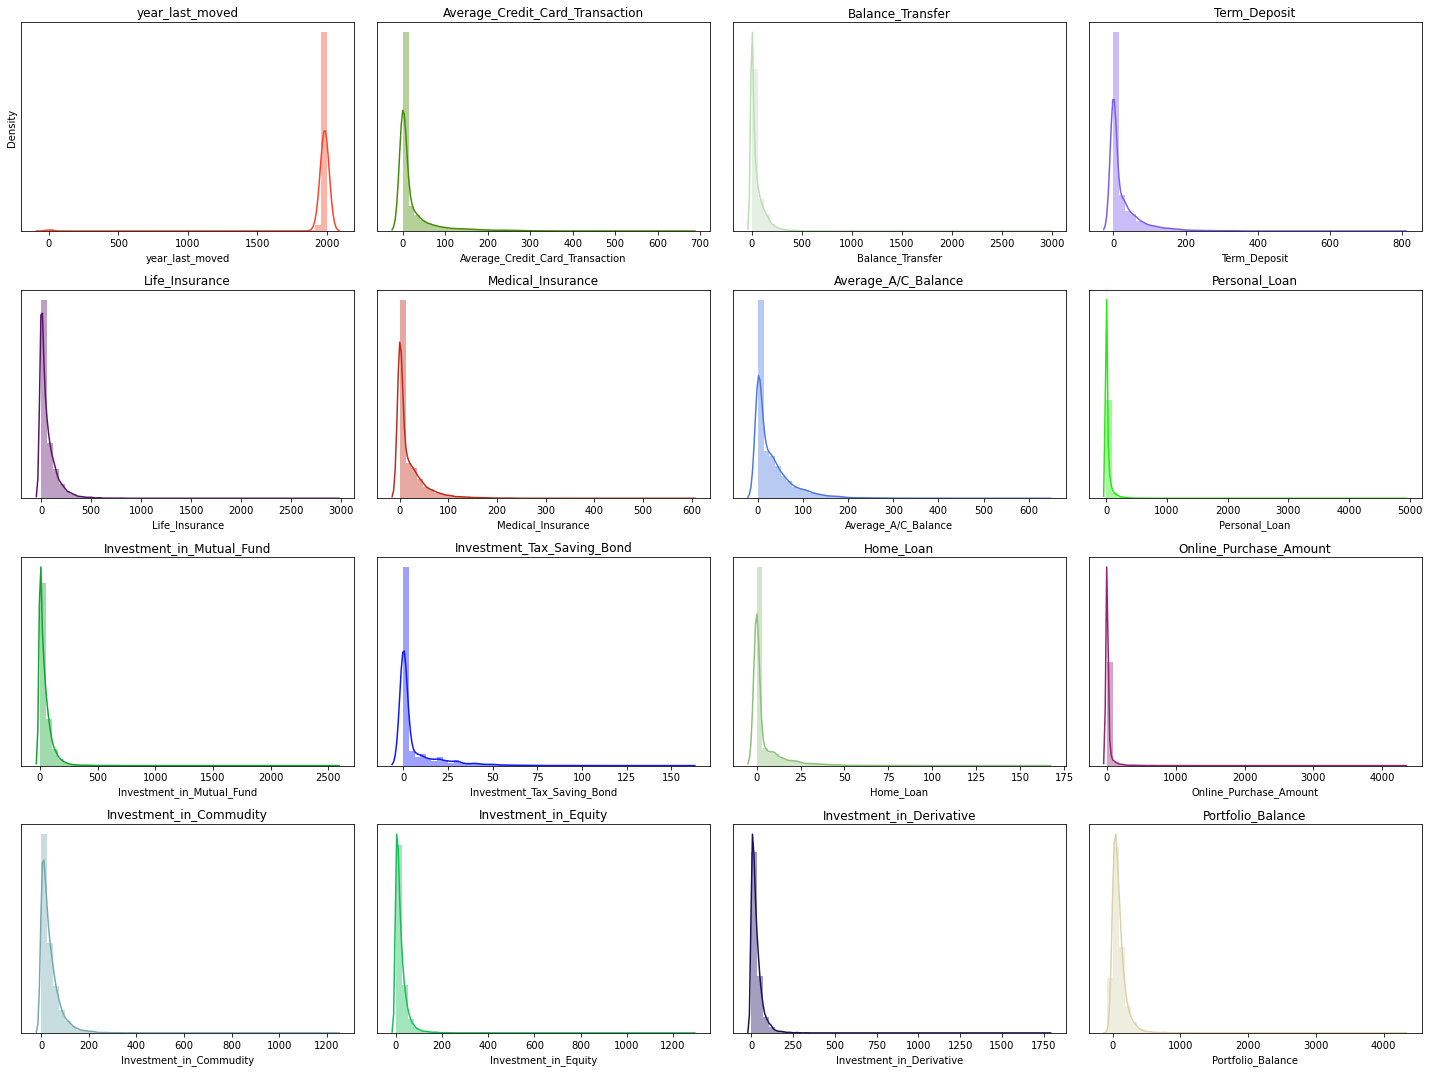

In [34]:
#Analyzing numerical features
from random import randint                       # For Random seed values
fig, axes = plt.subplots(nrows = 4, ncols = 4, sharex = False, figsize=(20, 15))   #The figure has 4 rows, 4 columns , each subplot will be independent
colors = []
for i in range(16):
  colors.append('#%06X' % randint(0, 0xFFFFFF))     #generating a random color hex
  columns=['year_last_moved','Average_Credit_Card_Transaction', 'Balance_Transfer', 'Term_Deposit', 'Life_Insurance', 'Medical_Insurance', 'Average_A/C_Balance', 'Personal_Loan', 'Investment_in_Mutual_Fund', 'Investment_Tax_Saving_Bond', 'Home_Loan', 'Online_Purchase_Amount', 'Investment_in_Commudity', 'Investment_in_Equity', 'Investment_in_Derivative', 'Portfolio_Balance']  #features for plotting
for ax, col, color in zip(axes.flat, columns, colors):
  sns.distplot(a = train[col], bins = 50, ax = ax, color = color) #vizualizing the distribution of the data
  ax.set_title(col)          #Set a title for the Axes.
  plt.setp(axes, yticks=[])     #Get or set the current tick locations and labels of the y-axis.
  ax.grid(False)                #hiding the Grid
plt.tight_layout()              #automatically adjust subplot parameters to give specified padding.
plt.show()                     #for displaying the distribution

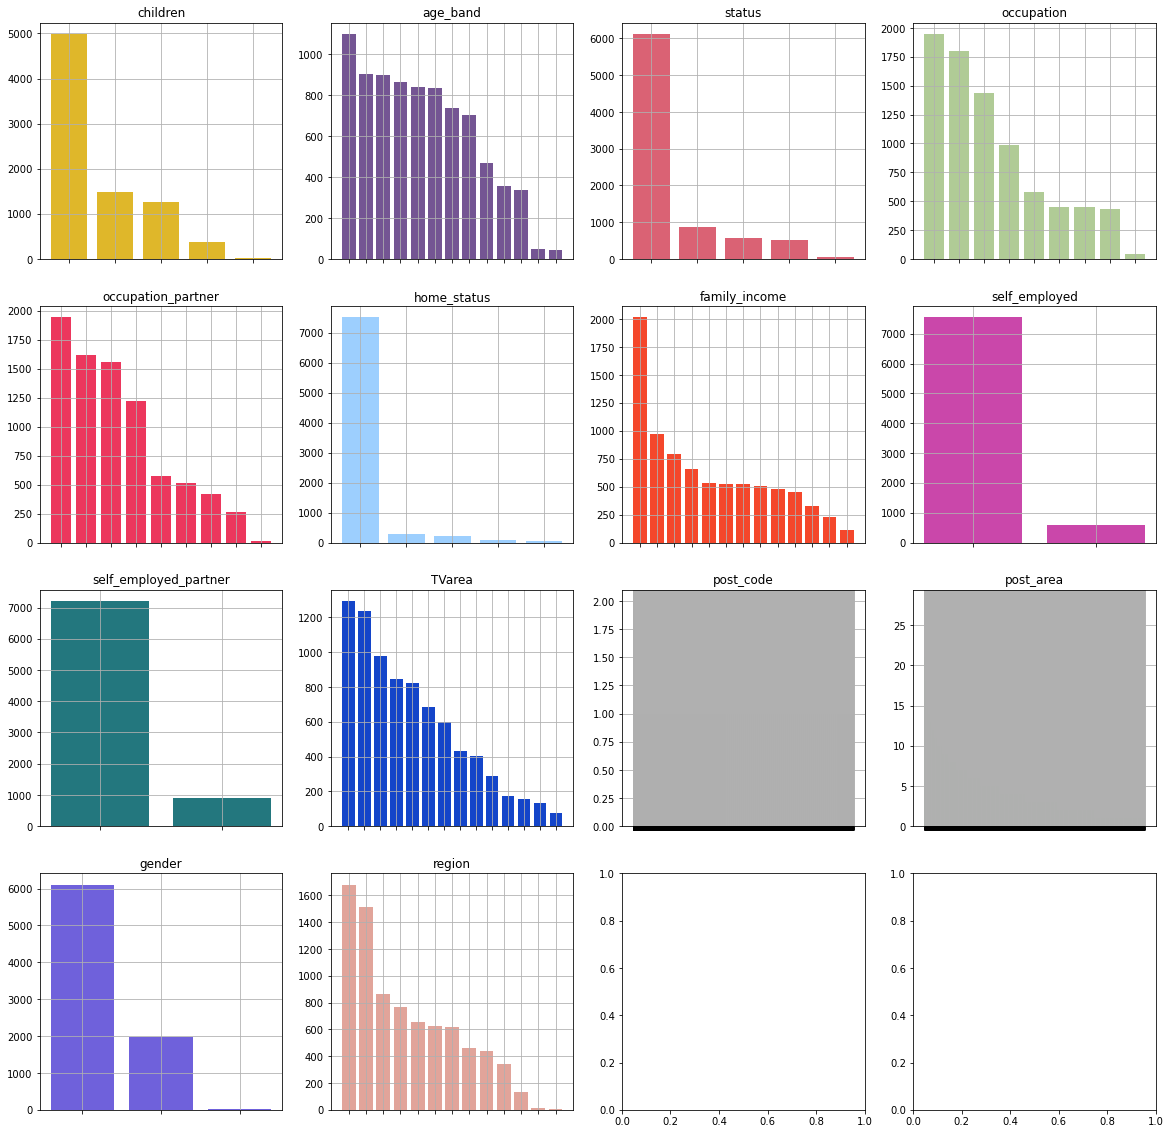

In [36]:
#Analyzing the categorical features of the data 

fig, axes = plt.subplots(nrows = 4, ncols = 4, sharex = False, figsize=(20, 20))   #The figure has 4 rows, 4 columns , each subplot will be independent

colors = []
for i in range(14):
  colors.append('#%06X' % randint(0, 0xFFFFFF))   #generating Random colour Hex
  
for ax, col, color in zip(axes.flat, object_cols, colors):
  ax.bar(x = train[col].value_counts().index, height = train[col].value_counts(), color = color)      #plotting bar graph
  ax.set_title(col)
  ax.set_xlabel(' ')
  ax.set_xticklabels(labels = ' ')
  ax.grid(True)           #displaying grid


### OBSERVATIONS

**Numerical Features**

-The numerical feature has **Asymmetrical Distribution**. The feature is either positive-skew distribution or negative-skew distribution. 

**Positive Skew Distribution**

Also known as Right Skewed Distribution as the tail of the distibution curve is longer on the right side. <br> - This also means **Mean > Median**

 + Average_Credit_Card_Transaction,
 + Balance_Transfer,
 + Term_Deposit,
 + Life_Insurance,
 + Medical_Insurance,
 + Average_A/C_Balance,
 + Personal_Loan
 + Investment_in_Mutual_Fund
 + Investment_Tax_Saving_Bond
 + Home_Loan
 + Online_Purchase_Amount
 + Investment_in_Commodity
 + Investment_in_Equity
 + Investment_in_Derivative
 + Portfolio_Balance
    
**Negative Skew Distibution**

Also known as Left Skewed Distribution as the tail of the distribution curve is longer on the left side. <br> - This also means **Mean < Median**

 + year_last_moved
    
**Categorical Features** 

- The categorical feature also has **Asymmetrical Distribution**, but it also has **Normal Distribution**. 

**Normal Distibution**

- In a normal distribution, the mean and the median are the same number. The distribution tails are exactly the same. 
<br>**Mean = Median = Mode**

 + age_band,
 + post_code,
 + post_area
    
**Positive Skew Distribution**

 + children,
 + status,
 + occupation,
 + occupation_partner,
 + home_status
 + family_income
 + self_employed
 + self_employed_partner
 + TVarea
 + gender
 + region
    
    
### DATA PREPROCESSING 

Pandas-profiling generates profile reports from a pandas DataFrame. The pandas df.describe() function is handy yet a little basic for exploratory data analysis. pandas-profiling extends pandas DataFrame with df.profile_report(), which automatically generates a standardized univariate and multivariate report for data understanding.

In [37]:
profile = ProfileReport(df=train)
profile.to_file(output_file='Customer-classification Pre Profiling Report.html')
print('Done!')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Accomplished!


### Observations 

- There are no missing values
- Variable types

     Numeric	17
     <BR>Categorical	13
     <BR>Boolean	2

- Some of the features are highly correlated to each other. 
-Post_code and post_area have high cardinality 


In [38]:
#Among the list of columns , year last moved , post area and post code are not necessary so we are going to drop them from the train data set as well as the test data set
 
train.drop(columns=['year_last_moved','post_area','post_code'], inplace=True)
 
test.drop(columns=['year_last_moved','post_area','post_code'], inplace=True)

### DATA POST-PROFILING 

As we have removed pre-processed the data now we will profile the data again to see if the data is ready for analyisis

In [39]:
profile = ProfileReport(df=train)
profile.to_file(output_file='Customer-classification Post Profiling Report.html')
print('Done!')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Done!


### EXPLORATORY DATA ANALYSIS

EDA is an approach to analyzing datasets to summarize their main characteristics, often with visual methods.

EDA is used for seeing what the data can tell us before the modeling task.

Exploratory data analysis is generally cross-classified in two ways.

- First, each method is either non-graphical or graphical.
- And second, each method is either univariate or multivariate (usually just bivariate).

**Univariate Analysis**
- Univariate analysis is the simplest form of data analysis, where the data being analyzed consists of only one variable.
- Since it’s a single variable, it doesn’t deal with causes or relationships.
- The main purpose of the univariate analysis is to describe the data and find patterns that exist within it.
- Visualizations used for performing univariate analysis:
   - Line Chart
   - Histogram

**Multivariate analysis**

- Multivariate data analysis refers to any statistical technique used to analyze data that arises from more than one variable.
- This model’s more realistic applications, where each situation, product, or decision involves more than a single variable.
- Visualizations used for performing multivariate analysis: 
    - Scatter Plot
    - Heatmap


In [40]:
#We are performing EDA as per the coulumns 
#REF_No will be used for indexing also it's different for each row.
#We are gathering the information about the children feature, and filtering the data as per number of children
train['children'].value_counts()


Zero    4991
1       1474
2       1271
3        375
4+        13
Name: children, dtype: int64

<AxesSubplot:xlabel='children', ylabel='count'>

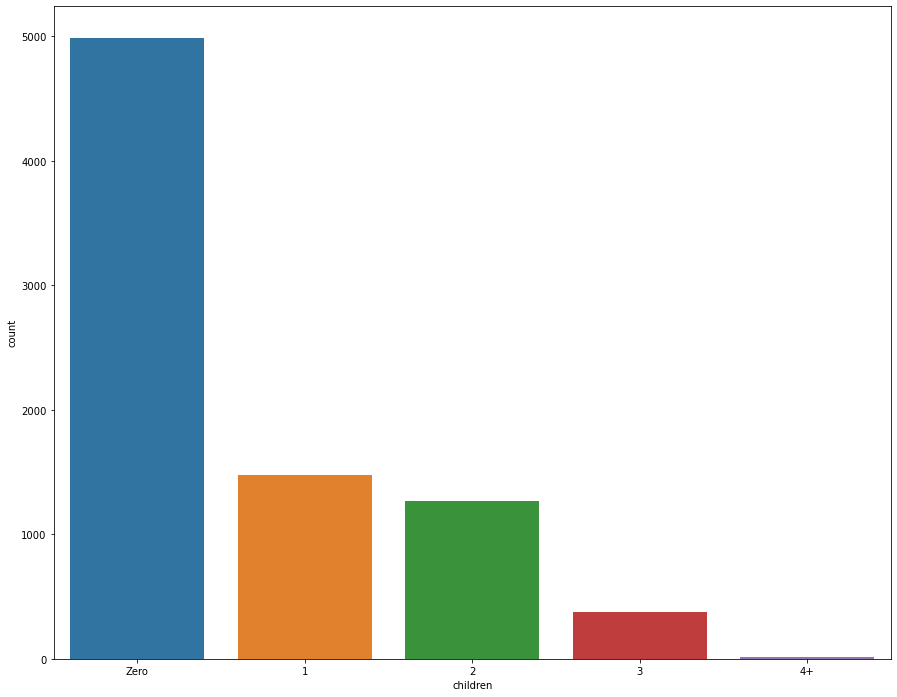

In [41]:
#plotting graph for the children feature by filtering the number of children one person has
plt.figure(figsize=(15,12))    #creating a figure
sns.countplot(x='children',data=train,order=train['children'].value_counts().index) #showing counts of the observation, where x is no. of childern, data is childeren feature of train set.


Age band: 45-50      1098
41-45       903
36-40       895
55-60       865
31-35       840
51-55       833
26-30       735
61-65       700
65-70       468
22-25       356
71+         337
18-21        50
Unknown      44
Name: age_band, dtype: int64


<AxesSubplot:xlabel='age_band', ylabel='count'>

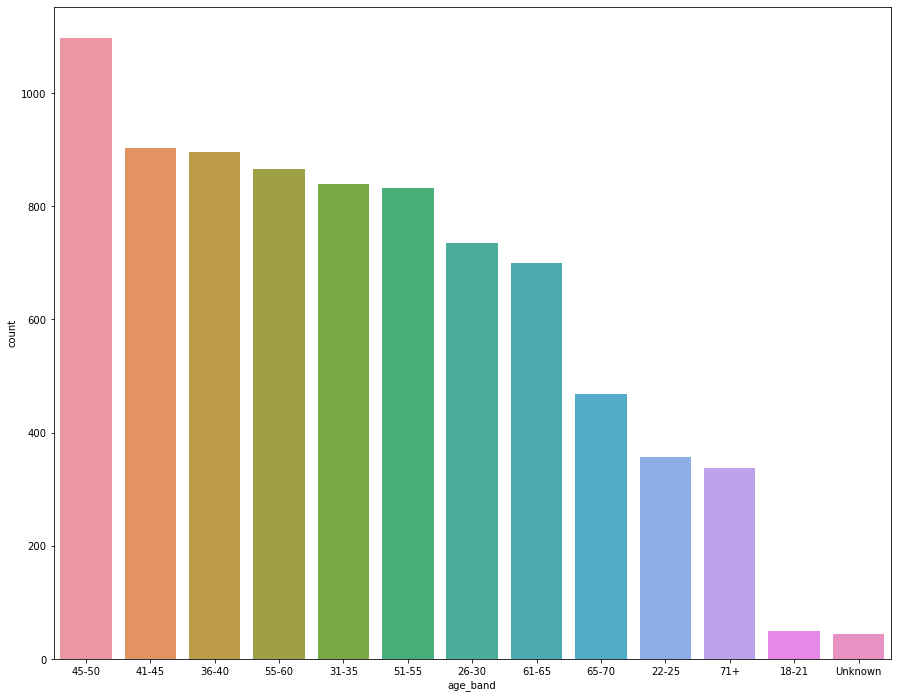

In [45]:
#We are filtering the data by age and plotting a graph for the same
train['age_band'].value_counts()
print('Age band:', train['age_band'].value_counts())

plt.figure(figsize=(15,12))
sns.countplot(x='age_band',data=train,order=train['age_band'].value_counts().index)


Status: Partner                 6124
Single/Never Married     881
Divorced/Separated       569
Widowed                  510
Unknown                   40
Name: status, dtype: int64


<AxesSubplot:xlabel='status', ylabel='count'>

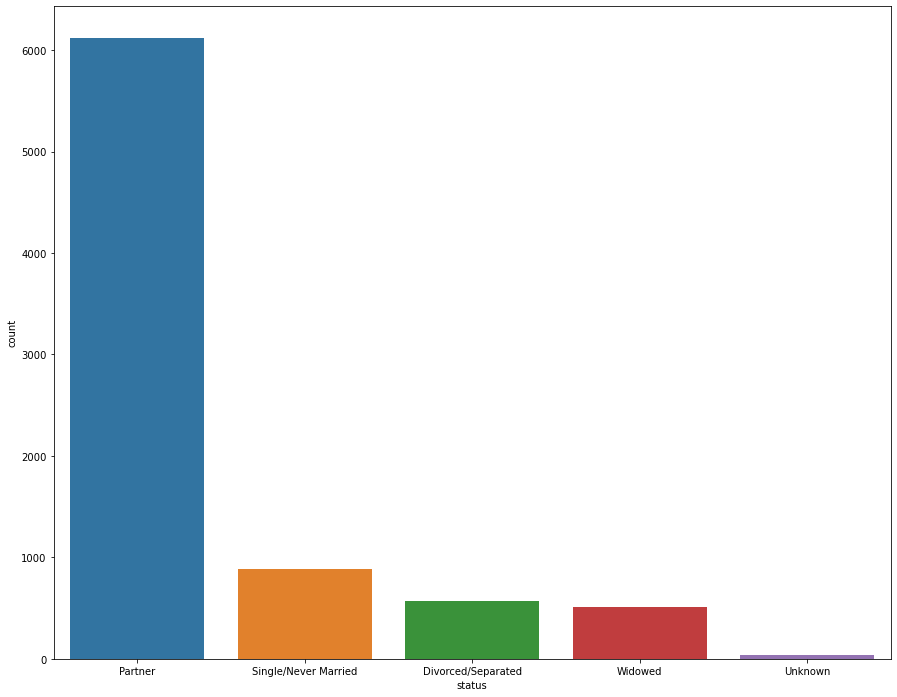

In [46]:
#We are filtering the data by marrital status and plotting a graph for the same
train['status'].value_counts()
print('Status:', train['status'].value_counts())

plt.figure(figsize=(15,12))
sns.countplot(x='status',data=train,order=train['status'].value_counts().index)


Gender: Female     6106
Male       1987
Unknown      31
Name: gender, dtype: int64


<AxesSubplot:xlabel='gender', ylabel='count'>

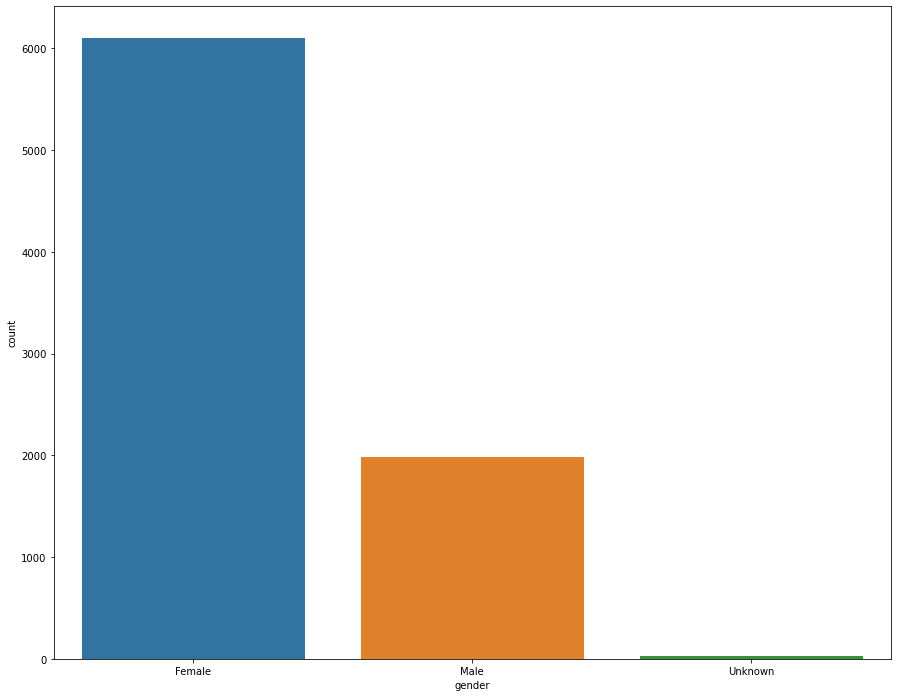

In [47]:
#We are filtering the data by Gender and plotting a graph for the same

train['gender'].value_counts()
print('Gender:', train['gender'].value_counts())

plt.figure(figsize=(15,12))
sns.countplot(x='gender',data=train,order=train['gender'].value_counts().index)


Occupation: Professional         1949
Retired              1799
Secretarial/Admin    1435
Housewife             984
Business Manager      578
Manual Worker         451
Unknown               449
Other                 432
Student                47
Name: occupation, dtype: int64


<AxesSubplot:xlabel='occupation', ylabel='count'>

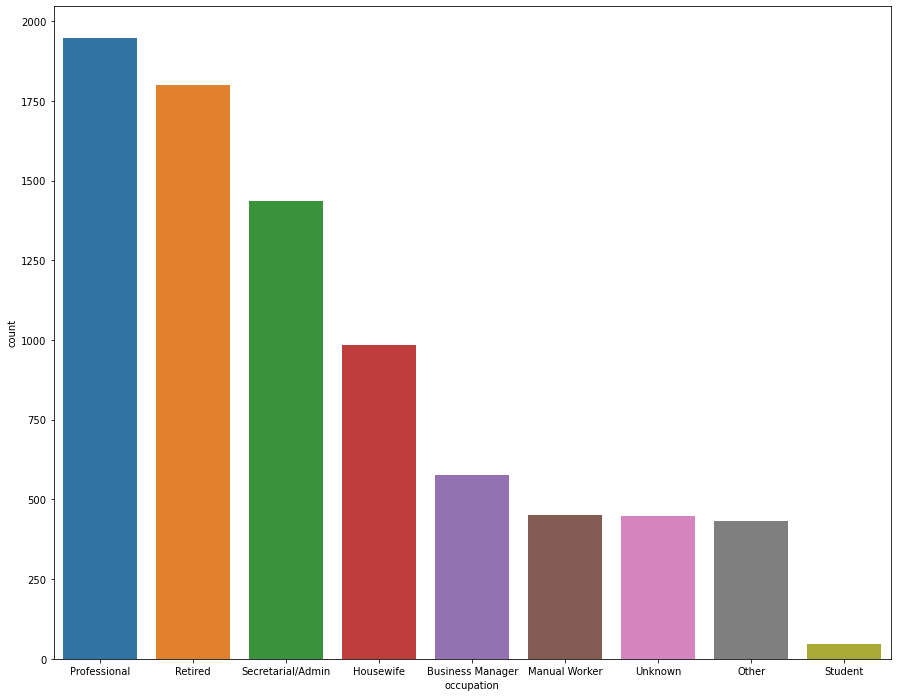

In [49]:
#We are filtering the data by occupation and plotting a graph for the same

train['occupation'].value_counts()
print('Occupation:', train['occupation'].value_counts())


plt.figure(figsize=(15,12))
sns.countplot(x='occupation',data=train,order=train['occupation'].value_counts().index)


Partners occupation Unknown              1942
Professional         1620
Retired              1558
Manual Worker        1222
Business Manager      575
Secretarial/Admin     510
Housewife             422
Other                 261
Student                14
Name: occupation_partner, dtype: int64


<AxesSubplot:xlabel='occupation_partner', ylabel='count'>

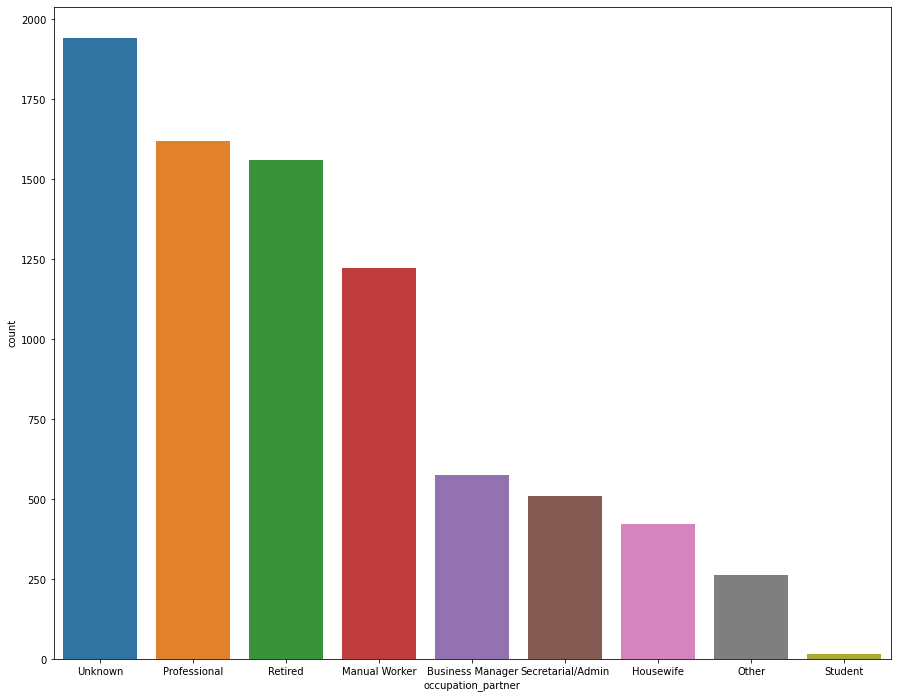

In [52]:
#We are filtering the data by the occupation of the partner and plotting a graph for the same
train['occupation_partner'].value_counts()
print('Partners occupation', train['occupation_partner'].value_counts())
      
plt.figure(figsize=(15,12))
sns.countplot(x='occupation_partner',data=train,order=train['occupation_partner'].value_counts().index)

Home status: Own Home                7506
Rent from Council/HA     279
Rent Privately           205
Live in Parental Hom      90
Unclassified              44
Name: home_status, dtype: int64


<AxesSubplot:xlabel='home_status', ylabel='count'>

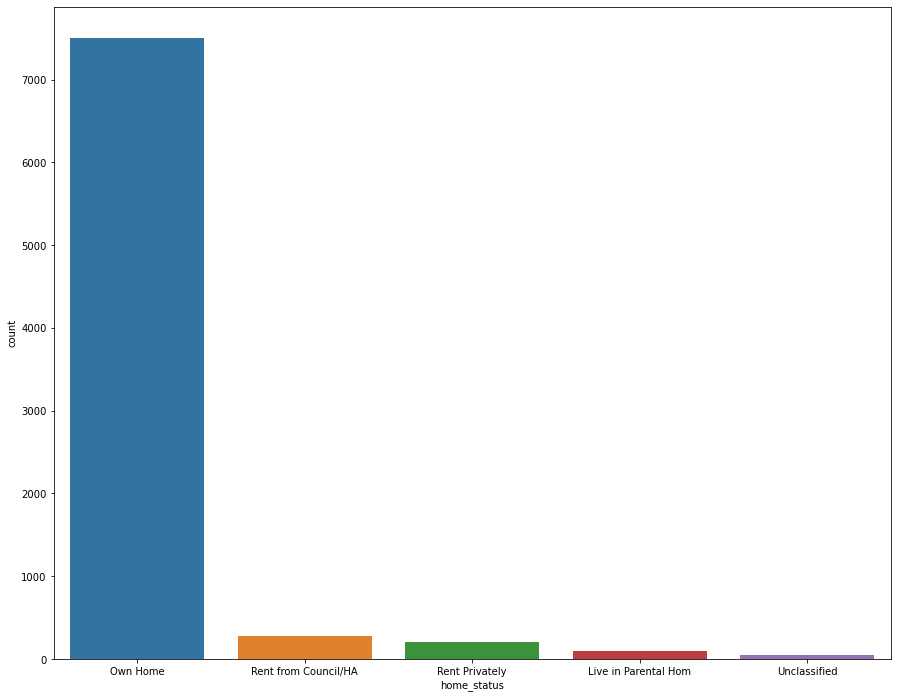

In [53]:
#We are filtering the data by home status and plotting the graph for the same
train['home_status'].value_counts()
print('Home status:', train['home_status'].value_counts())
plt.figure(figsize=(15,12))
sns.countplot(x='home_status',data=train,order=train['home_status'].value_counts().index)


family_income: >=35,000             2014
<27,500, >=25,000     969
<30,000, >=27,500     796
<25,000, >=22,500     656
<12,500, >=10,000     535
<20,000, >=17,500     525
<17,500, >=15,000     521
<15,000, >=12,500     508
<22,500, >=20,000     479
<10,000, >= 8,000     452
< 8,000, >= 4,000     328
< 4,000               233
Unknown               108
Name: family_income, dtype: int64


<AxesSubplot:xlabel='family_income', ylabel='count'>

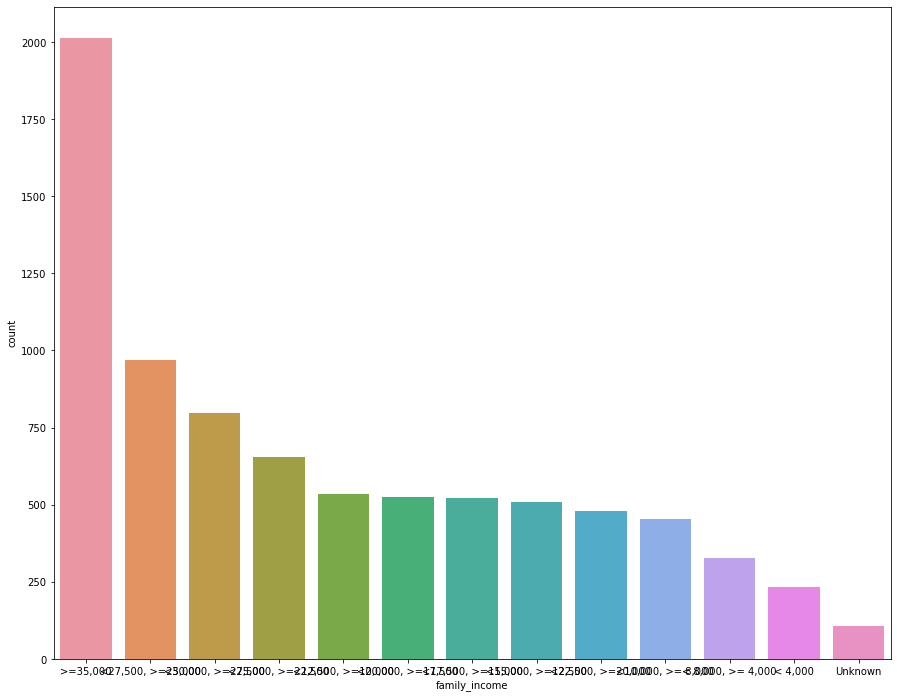

In [54]:
#We are filtering the data by family income and plotting the graph for the same
train['family_income'].value_counts()
print('family_income:', train['family_income'].value_counts())
plt.figure(figsize=(15,12))
sns.countplot(x='family_income',data=train,order=train['family_income'].value_counts().index)


Self Employed people are: No     7543
Yes     581
Name: self_employed, dtype: int64


<AxesSubplot:xlabel='self_employed', ylabel='count'>

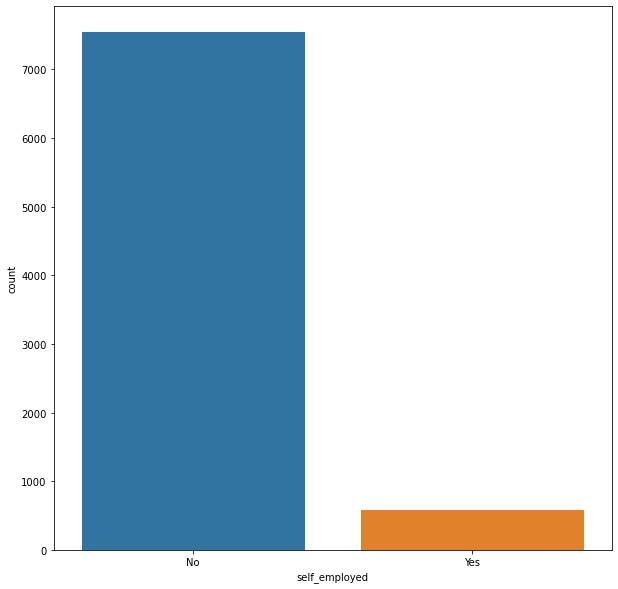

In [57]:
train['self_employed'].value_counts()
print('Self Employed people are:', train['self_employed'].value_counts())
plt.figure(figsize=(10,10))
sns.countplot(x='self_employed',data=train,order=train['self_employed'].value_counts().index)


Self employed people are : No     7543
Yes     581
Name: self_employed, dtype: int64


<AxesSubplot:xlabel='self_employed', ylabel='count'>

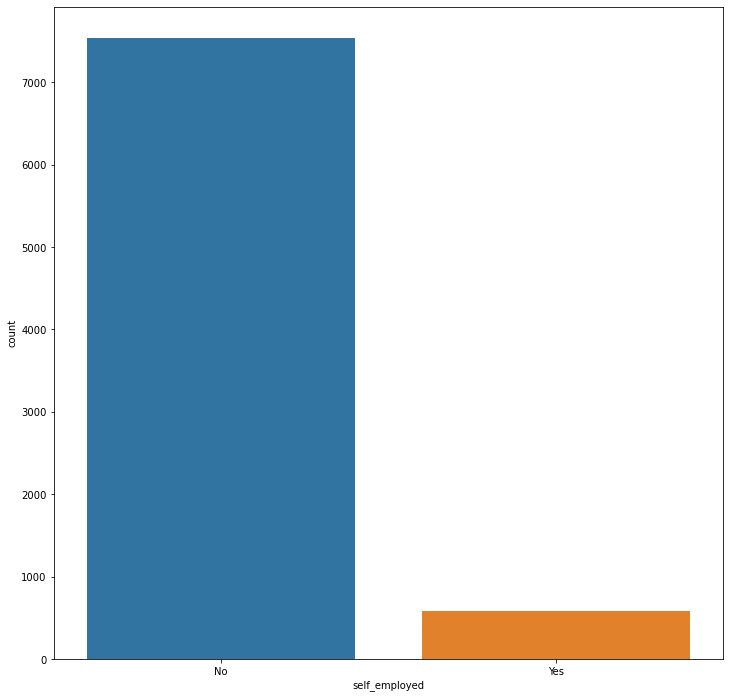

In [58]:
#We are filtering the data by the self employment and plotting a graph for the same 
train['self_employed'].value_counts()
print('Self employed people are :', train['self_employed'].value_counts())


plt.figure(figsize=(12,12))
sns.countplot(x='self_employed',data=train,order=train['self_employed'].value_counts().index)



Self employed partners are: No     7207
Yes     917
Name: self_employed_partner, dtype: int64


<AxesSubplot:xlabel='self_employed_partner', ylabel='count'>

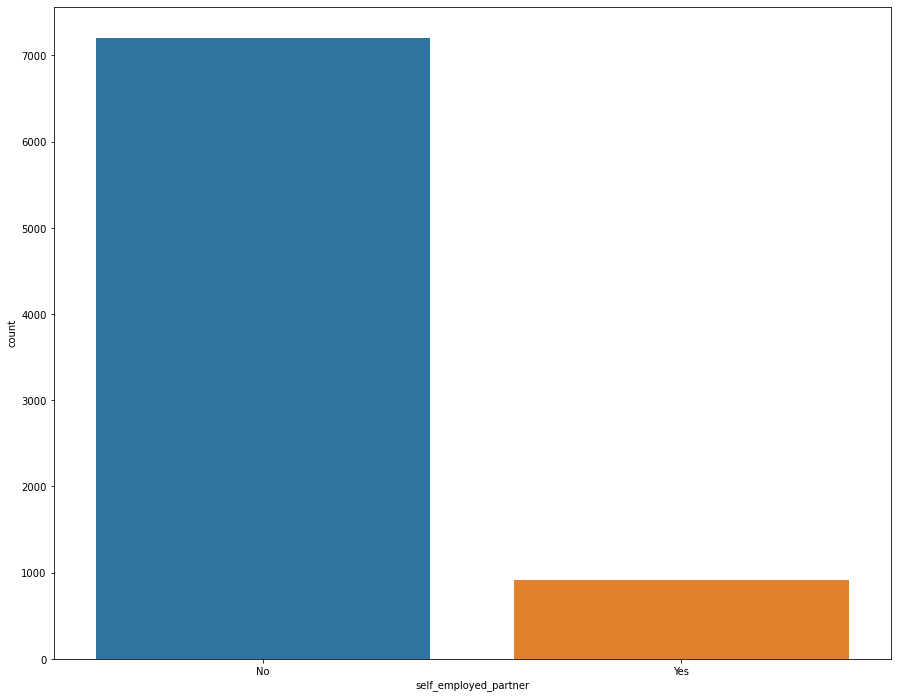

In [60]:
#We are filtering the data by self employed partner and plotting a graph for the same
train['self_employed_partner'].value_counts()
print('Self employed partners are:', train['self_employed_partner'].value_counts())
plt.figure(figsize=(15,12))
sns.countplot(x='self_employed_partner',data=train,order=train['self_employed_partner'].value_counts().index)


TV area is: Central          1294
Carlton          1237
Meridian          977
Yorkshire         847
Granada           824
HTV               683
Anglia            597
Tyne Tees         433
Scottish TV       406
TV South West     286
Grampian          175
Unknown           154
Ulster            135
Border             76
Name: TVarea, dtype: int64


<AxesSubplot:xlabel='count', ylabel='TVarea'>

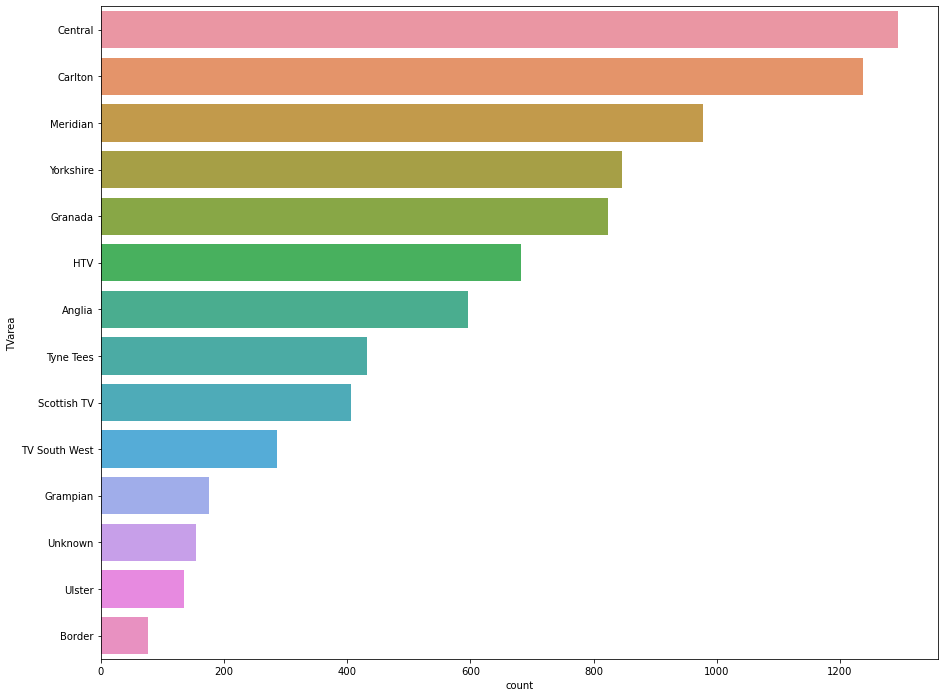

In [61]:
#We are filtering the data by the TV area and plotting the graph for the same
train['TVarea'].value_counts()
print('TV area is:', train['TVarea'].value_counts())
plt.figure(figsize=(15,12))
sns.countplot(y='TVarea',data=train,order=train['TVarea'].value_counts().index)


Region is : South East          1680
North West          1517
Unknown              866
South West           769
West Midlands        658
East Midlands        623
Scotland             615
North                460
Wales                437
East Anglia          344
Northern Ireland     135
Isle of Man           15
Channel Islands        5
Name: region, dtype: int64


<AxesSubplot:xlabel='count', ylabel='region'>

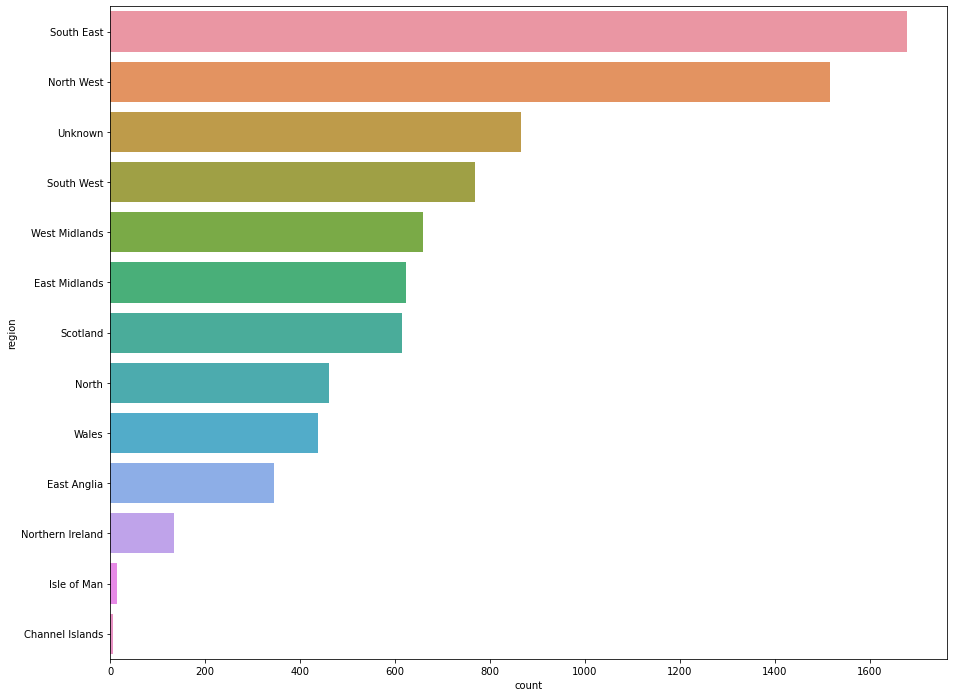

In [62]:
#We are filtering the data by the region and plotting a graph for the same
train['region'].value_counts()
print('Region is :', train['region'].value_counts())
plt.figure(figsize=(15,12))
sns.countplot(y='region',data=train,order=train['region'].value_counts().index)


Revune Grid is: 2    7264
1     860
Name: Revenue_Grid, dtype: int64


<AxesSubplot:xlabel='Revenue_Grid', ylabel='count'>

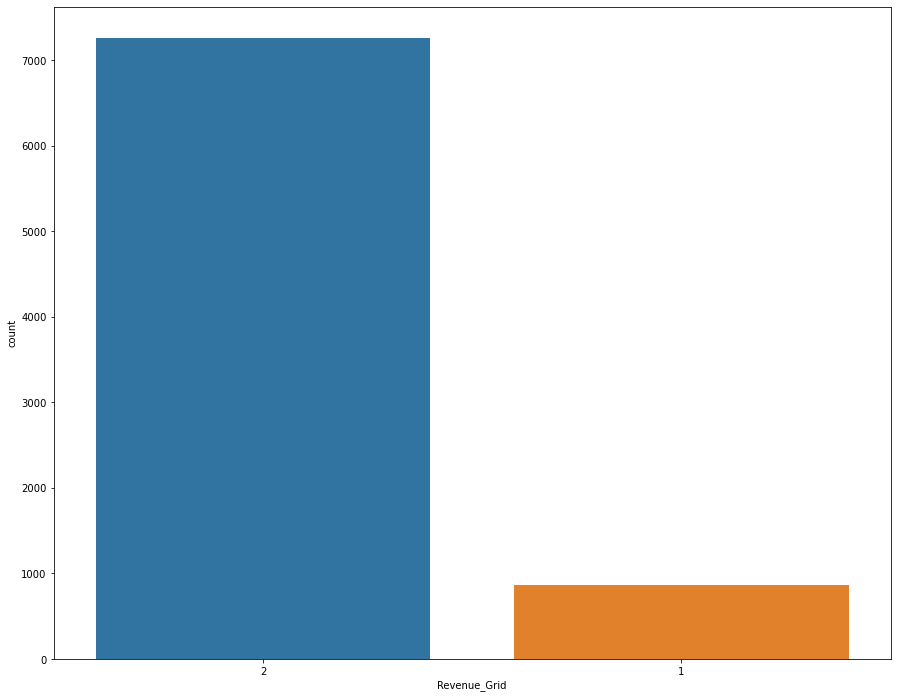

In [63]:
#We are filtering the data by the Revenue grid and plotting a graph for the same
train['Revenue_Grid'].value_counts()
print('Revune Grid is:', train['Revenue_Grid'].value_counts())
plt.figure(figsize=(15,12))
sns.countplot(x='Revenue_Grid',data=train,order=train['Revenue_Grid'].value_counts().index)


Customers who are High Net Worth: 860
Customers who are Low Net Worth: 7264


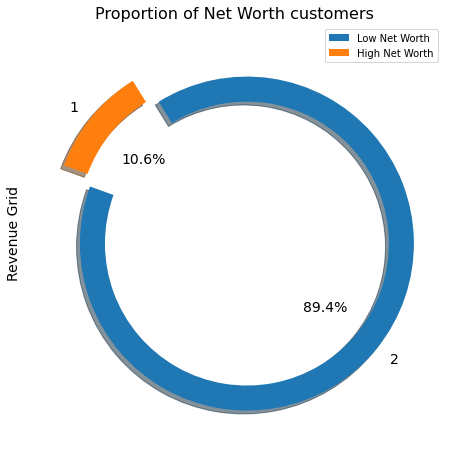

In [66]:
#Revenue percentage as per Revume Grid
print('Customers who are High Net Worth:', train['Revenue_Grid'].value_counts()[1])
print('Customers who are Low Net Worth:', train['Revenue_Grid'].value_counts()[2])

space = np.ones(2)/10  #returns an array as per the new dimension
train['Revenue_Grid'].value_counts().plot(kind = 'pie', explode = space,fontsize = 14, autopct = '%3.1f%%', wedgeprops = dict(width=0.15), 
                                    shadow = True, startangle = 160, figsize = [13.66, 7.68], legend = True)  #plotting a pie chart, expoding the percentage of people with high net worth,
plt.legend(['Low Net Worth', 'High Net Worth'])  #defining legend labels with plot
plt.ylabel('Revenue Grid', size = 14)            #setting label for y axis  
plt.title('Proportion of Net Worth customers', size = 16)    #setting tittle for pie
plt.show()



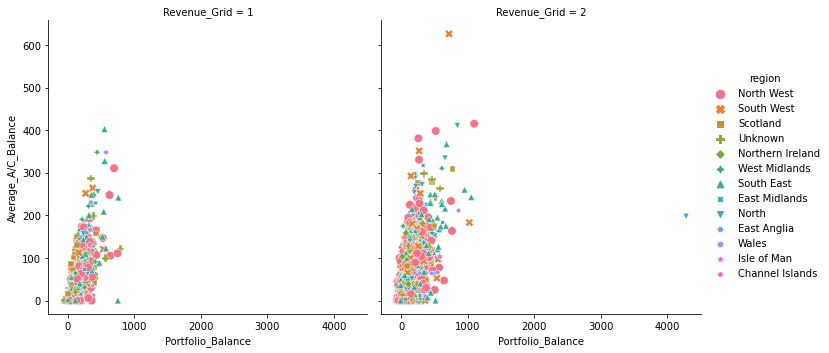

In [67]:
#Revenue grid plotting as per the average account balance and portfolio balance along with region
sns.relplot(                      #Figure-level interface for drawing relational plots onto a FacetGrid.
data=train, x="Portfolio_Balance", y="Average_A/C_Balance",  #setting axis, column will be revenue grid,grouping and size by region,
col="Revenue_Grid", hue="region", style="region",
kind="scatter", size="region"
)


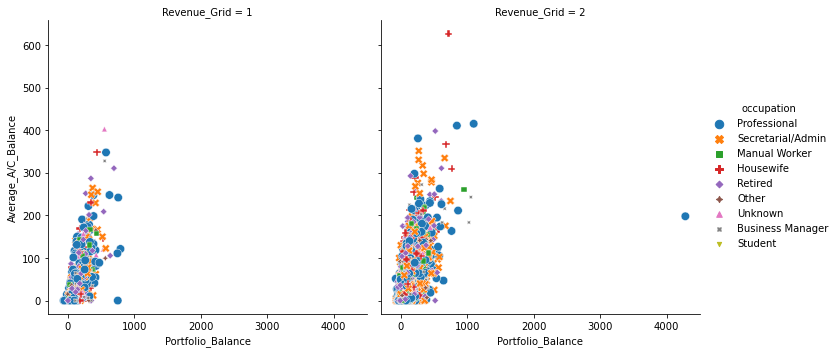

In [68]:
#plotting a scatter graph by occupation, the graph shows the portfolio balance, avergae account balance, reveune grid by occupation
sns.relplot(
     data=train, x="Portfolio_Balance", y="Average_A/C_Balance", 
     col="Revenue_Grid", hue="occupation", style="occupation",
     kind="scatter", size="occupation"
 )


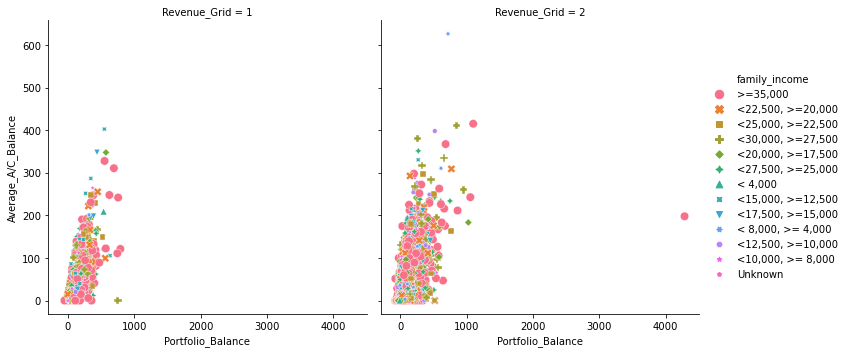

In [69]:
#plotting a scatter graph by family income, the graph shows the portfolio balance, avergae account balance, reveune grid by occupation

sns.relplot(
     data=train, x="Portfolio_Balance", y="Average_A/C_Balance",
    col="Revenue_Grid", hue="family_income", style="family_income",
     kind="scatter", size="family_income"
 )


<AxesSubplot:xlabel='Revenue_Grid'>

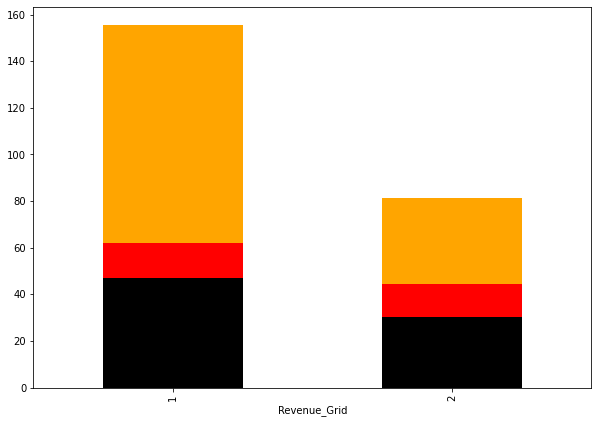

In [71]:
#Grouping data by revenue grid by filtering portfolio balance, balance transfer,average account balance  and plotting bar graph according the mean of given data.

train.groupby(['Revenue_Grid'])['Portfolio_Balance'].mean().plot(kind='bar', figsize=(10, 7), color='orange')
train.groupby(['Revenue_Grid'])['Balance_Transfer'].mean().plot(kind='bar', figsize=(10, 7), color='red')
train.groupby(['Revenue_Grid'])['Average_A/C_Balance'].mean().plot(kind='bar', figsize=(10, 7), color='black')


<AxesSubplot:xlabel='Revenue_Grid'>

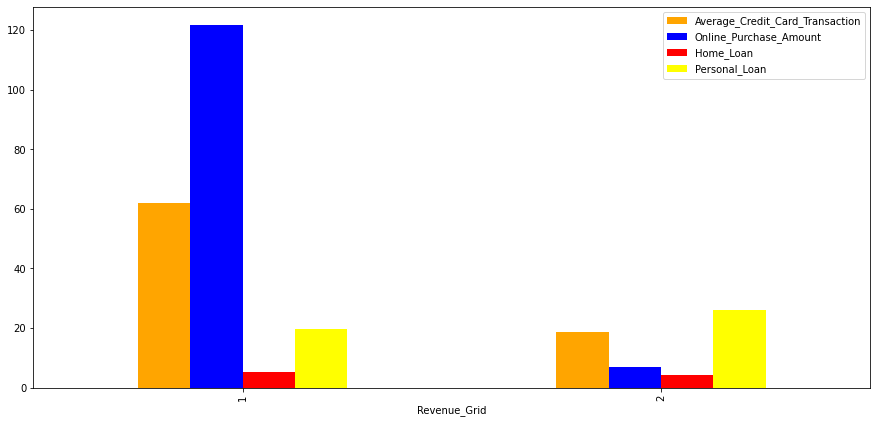

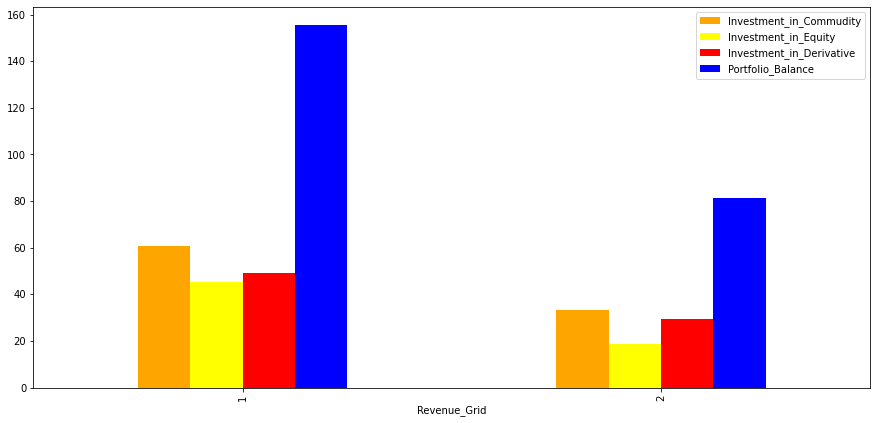

In [72]:

train.groupby(['Revenue_Grid'])[['Average_Credit_Card_Transaction','Online_Purchase_Amount','Home_Loan', 'Personal_Loan']].mean().plot(kind='bar', figsize=(15, 7), color=['orange','blue','red','yellow'])


train.groupby(['Revenue_Grid'])[['Investment_in_Commudity','Investment_in_Equity','Investment_in_Derivative', 'Portfolio_Balance']].mean().plot(kind='bar', figsize=(15, 7), color=['orange','yellow','red','blue'])


Correlation Matrix is:                                    REF_NO  Average_Credit_Card_Transaction  \
REF_NO                           1.000000                        -0.003218   
Average_Credit_Card_Transaction -0.003218                         1.000000   
Balance_Transfer                -0.006604                         0.122762   
Term_Deposit                     0.003851                         0.317612   
Life_Insurance                   0.010882                         0.142606   
Medical_Insurance                0.019814                         0.416773   
Average_A/C_Balance             -0.003665                         0.178150   
Personal_Loan                   -0.008298                         0.089357   
Investment_in_Mutual_Fund       -0.003864                         0.147438   
Investment_Tax_Saving_Bond       0.006365                         0.131641   
Home_Loan                       -0.016627                         0.103417   
Online_Purchase_Amount           0.004514

Text(0.5, 1.0, 'Correlation between Numerical features and target variable')

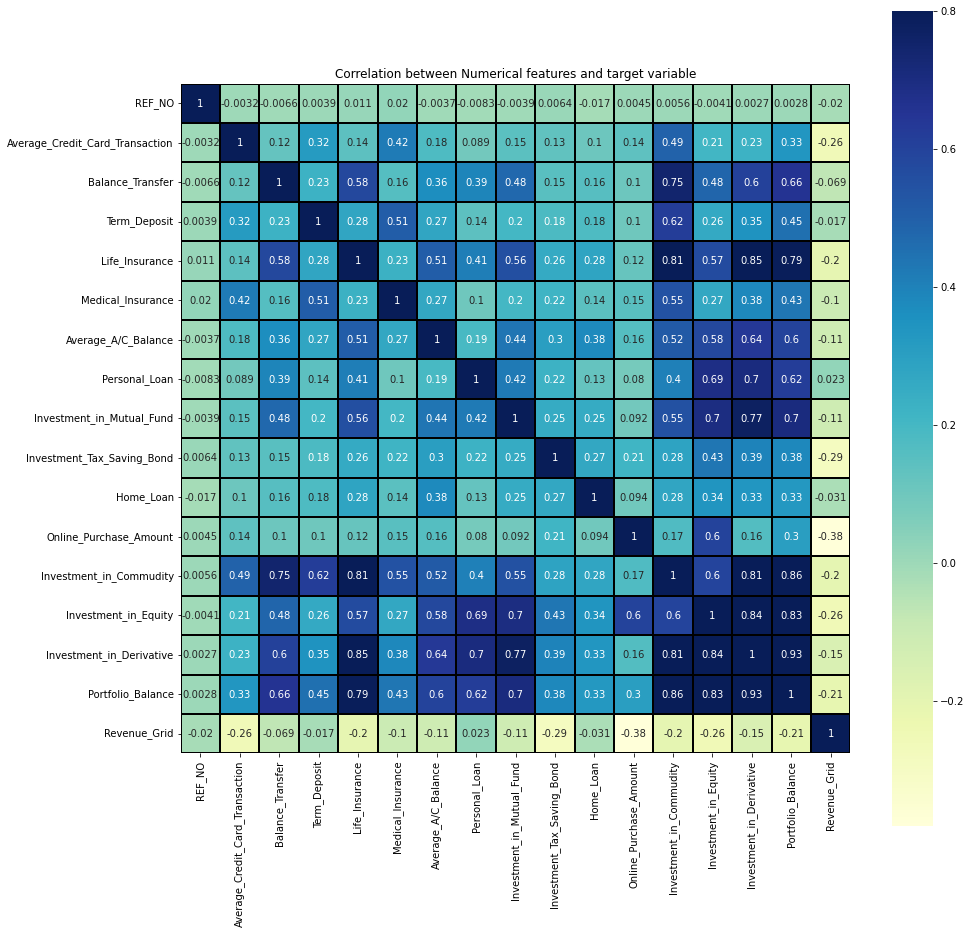

In [82]:
#Correlation is a measure used to represent how strongly two random variables are related to each other.
#Correlation ranges between -1 and +1
corr = train.corr(method='pearson') #using pearson correlation coeffiecnt as we have raw data value
print('Correlation Matrix is:', corr)
plt.figure(figsize=(15,15))
sns.heatmap(corr,vmax=.8,linewidth=.01, square = True, annot = True,cmap='YlGnBu',linecolor ='black') #plotting the heatmap for correlation

plt.title('Correlation between Numerical features and target variable')

In [104]:
y= train.Revenue_Grid

#Covariance indicates the relationship of two variables whenever one variable changes.
#Covariance can vary between -∞ and +∞
train.cov() #for checking the covarince between the features


,REF_NO,Average_Credit_Card_Transaction,Balance_Transfer,Term_Deposit,Life_Insurance,Medical_Insurance,Average_A/C_Balance,Personal_Loan,Investment_in_Mutual_Fund,Investment_Tax_Saving_Bond,Home_Loan,Online_Purchase_Amount,Investment_in_Commudity,Investment_in_Equity,Investment_in_Derivative,Portfolio_Balance,Revenue_Grid
REF_NO,1.103899e+07,-546.820899,-1735.178152,692.686958,3462.187001,2108.075781,-550.943030,-2347.021812,-826.894470,267.993081,-549.444633,1385.016825,796.160351,-436.783543,352.252733,994.034659,-20.293950
Average_Credit_Card_Transaction,-5.468209e+02,2616.066366,496.569883,879.403539,698.484781,682.616205,412.310630,389.079329,485.765863,85.330925,52.608194,639.820699,1074.628385,344.152845,458.927642,1853.816510,-4.100389
Balance_Transfer,-1.735178e+03,496.569883,6254.388576,965.111469,4386.991359,410.524084,1304.304017,2628.810512,2425.206173,152.827101,122.169779,753.954829,2502.713225,1231.217597,1884.779734,5614.648909,-1.670343
Term_Deposit,6.926870e+02,879.403539,965.111469,2930.439791,1440.116194,882.446473,672.520276,652.152823,700.346332,124.581106,96.450433,511.578056,1419.500752,459.608519,745.358823,2649.698435,-0.290006
Life_Insurance,3.462187e+03,698.484781,4386.991359,1440.116194,9170.447054,710.921666,2200.729815,3352.098608,3441.641101,312.810539,267.955522,1042.066598,3281.388190,1769.557797,3198.109456,8222.823993,-5.951646
Medical_Insurance,2.108076e+03,682.616205,410.524084,882.446473,710.921666,1025.429738,386.633071,277.309961,417.256791,87.337456,46.150204,441.556068,742.387871,276.042355,484.147454,1503.726392,-1.007096
Average_A/C_Balance,-5.509430e+02,412.310630,1304.304017,672.520276,2200.729815,386.633071,2047.511784,745.255882,1275.924609,173.504748,169.915142,669.818708,995.299120,846.992586,1138.260182,2939.695507,-1.590718
Personal_Loan,-2.347022e+03,389.079329,2628.810512,652.152823,3352.098608,277.309961,745.255882,7247.142423,2326.727849,241.685960,106.139824,627.479592,1459.889506,1882.408869,2365.038261,5700.282267,0.598251
Investment_in_Mutual_Fund,-8.268945e+02,485.765863,2425.206173,700.346332,3441.641101,417.256791,1275.924609,2326.727849,4149.424055,206.864468,163.020154,547.021513,1494.040003,1444.835012,1969.640436,4914.106457,-2.180526
Investment_Tax_Saving_Bond,2.679931e+02,85.330925,152.827101,124.581106,312.810539,87.337456,173.504748,241.685960,206.864468,160.614404,33.488979,246.304850,152.576717,177.077757,197.136327,527.232131,-1.112766


### OBSERVATIONS

 + 10.6% people have High Net Worth,89.4% people have Low Net Worth.
 + There is higher positive correlation for Personal_Loan with Portfolio_Balance and Investment_in_Equity
 + There is strong positive correlation for Portfolio_Balance with Investment_in_Derivative, Investment_in_Commodity,Investment_in_Equity and Life_Insurance
 + There is strong positive correlation for Life_Insurance with Investment_in_Derivative and Investment_in_Commodity
 + There is higher positive correlation for Balance_Transfer with Portfolio_Balance, Investment_in_Commodity and Investment_in_Derivative
 + There is higher positive correlation for Term_Deposit with Investment_in_Commodity

### DATA ENCODING

The performance of a machine learning model not only depends on the model and the hyperparameters but also on how we process and feed different types of variables to the model. Since most machine learning models only accept numerical variables, preprocessing the categorical variables becomes a necessary step. We need to convert these categorical variables to numbers such that the model is able to understand and extract valuable information.

**One Hot Encoding**
 
   This technique is used when the features are Nominal(which means they do not have any order).In one hot encoding, for each level of a categorical feature, we create a new variable. Each category is mapped with a binary variable containing either 0 or 1. Here, 0 represents the absence, and 1 represents the presence of that category.

 



In [84]:

#onehotencoder

from sklearn.preprocessing import OneHotEncoder  #importing onehotencode library
ohe = OneHotEncoder()   #defining onehotencoder
categorical = train.loc[:, ['children','age_band', 'status', 'occupation', 'occupation_partner', 'home_status', 'family_income', 'self_employed', 'self_employed_partner', 'TVarea', 'gender','region']] #defining the categorical data which needs to be encoded
encoded_data = ohe.fit_transform(categorical)   #transforming data
cols = ohe.get_feature_names(['children','age_band', 'status', 'occupation', 'occupation_partner', 'home_status', 'family_income', 'self_employed', 'self_employed_partner', 'TVarea', 'gender','region']) #Get output feature names for transformation.
encoded_features = pd.DataFrame(encoded_data.todense(), columns=cols)    #returning dense representation of given columns



In [85]:
#getting shape of the encoded data
encoded_features.shape


(8124, 93)

In [86]:
#getting first 10 rows of the encoded data
encoded_features.head(10)



,children_1,children_2,children_3,children_4+,children_Zero,age_band_18-21,age_band_22-25,age_band_26-30,age_band_31-35,age_band_36-40,age_band_41-45,age_band_45-50,age_band_51-55,age_band_55-60,age_band_61-65,age_band_65-70,age_band_71+,age_band_Unknown,status_Divorced/Separated,status_Partner,status_Single/Never Married,status_Unknown,status_Widowed,occupation_Business Manager,occupation_Housewife,occupation_Manual Worker,occupation_Other,occupation_Professional,occupation_Retired,occupation_Secretarial/Admin,occupation_Student,occupation_Unknown,occupation_partner_Business Manager,occupation_partner_Housewife,occupation_partner_Manual Worker,occupation_partner_Other,occupation_partner_Professional,occupation_partner_Retired,occupation_partner_Secretarial/Admin,occupation_partner_Student,occupation_partner_Unknown,home_status_Live in Parental Hom,home_status_Own Home,home_status_Rent Privately,home_status_Rent from Council/HA,home_status_Unclassified,"family_income_< 4,000","family_income_< 8,000, >= 4,000","family_income_<10,000, >= 8,000","family_income_<12,500, >=10,000","family_income_<15,000, >=12,500","family_income_<17,500, >=15,000","family_income_<20,000, >=17,500","family_income_<22,500, >=20,000","family_income_<25,000, >=22,500","family_income_<27,500, >=25,000","family_income_<30,000, >=27,500","family_income_>=35,000",family_income_Unknown,self_employed_No,self_employed_Yes,self_employed_partner_No,self_employed_partner_Yes,TVarea_Anglia,TVarea_Border,TVarea_Carlton,TVarea_Central,TVarea_Grampian,TVarea_Granada,TVarea_HTV,TVarea_Meridian,TVarea_Scottish TV,TVarea_TV South West,TVarea_Tyne Tees,TVarea_Ulster,TVarea_Unknown,TVarea_Yorkshire,gender_Female,gender_Male,gender_Unknown,region_Channel Islands,region_East Anglia,region_East Midlands,region_Isle of Man,region_North,region_North West,region_Northern Ireland,region_Scotland,region_South East,region_South West,region_Unknown,region_Wales,region_West Midlands
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [87]:
#checking for data type of the encoded features
encoded_features.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 93 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   children_1                            8124 non-null   float64
 1   children_2                            8124 non-null   float64
 2   children_3                            8124 non-null   float64
 3   children_4+                           8124 non-null   float64
 4   children_Zero                         8124 non-null   float64
 5   age_band_18-21                        8124 non-null   float64
 6   age_band_22-25                        8124 non-null   float64
 7   age_band_26-30                        8124 non-null   float64
 8   age_band_31-35                        8124 non-null   float64
 9   age_band_36-40                        8124 non-null   float64
 10  age_band_41-45                        8124 non-null   float64
 11  age_band_45-50   

In [88]:

# applying one-hot encoding for Test Dataset
#ohe = OneHotEncoder()
test_categorical = test.loc[:, ['children','age_band', 'status', 'occupation', 'occupation_partner', 'home_status', 'family_income', 'self_employed', 'self_employed_partner', 'TVarea', 'gender','region']]
encoded_test_data = ohe.transform(test_categorical)
test_cols = ohe.get_feature_names(['children','age_band', 'status', 'occupation', 'occupation_partner', 'home_status', 'family_income', 'self_employed', 'self_employed_partner', 'TVarea', 'gender','region'])
encoded_test_features = pd.DataFrame(encoded_test_data.todense(), columns=test_cols)



In [89]:
encoded_test_features.shape


(2031, 93)

In [90]:
encoded_test_features.head(10)


,children_1,children_2,children_3,children_4+,children_Zero,age_band_18-21,age_band_22-25,age_band_26-30,age_band_31-35,age_band_36-40,age_band_41-45,age_band_45-50,age_band_51-55,age_band_55-60,age_band_61-65,age_band_65-70,age_band_71+,age_band_Unknown,status_Divorced/Separated,status_Partner,status_Single/Never Married,status_Unknown,status_Widowed,occupation_Business Manager,occupation_Housewife,occupation_Manual Worker,occupation_Other,occupation_Professional,occupation_Retired,occupation_Secretarial/Admin,occupation_Student,occupation_Unknown,occupation_partner_Business Manager,occupation_partner_Housewife,occupation_partner_Manual Worker,occupation_partner_Other,occupation_partner_Professional,occupation_partner_Retired,occupation_partner_Secretarial/Admin,occupation_partner_Student,occupation_partner_Unknown,home_status_Live in Parental Hom,home_status_Own Home,home_status_Rent Privately,home_status_Rent from Council/HA,home_status_Unclassified,"family_income_< 4,000","family_income_< 8,000, >= 4,000","family_income_<10,000, >= 8,000","family_income_<12,500, >=10,000","family_income_<15,000, >=12,500","family_income_<17,500, >=15,000","family_income_<20,000, >=17,500","family_income_<22,500, >=20,000","family_income_<25,000, >=22,500","family_income_<27,500, >=25,000","family_income_<30,000, >=27,500","family_income_>=35,000",family_income_Unknown,self_employed_No,self_employed_Yes,self_employed_partner_No,self_employed_partner_Yes,TVarea_Anglia,TVarea_Border,TVarea_Carlton,TVarea_Central,TVarea_Grampian,TVarea_Granada,TVarea_HTV,TVarea_Meridian,TVarea_Scottish TV,TVarea_TV South West,TVarea_Tyne Tees,TVarea_Ulster,TVarea_Unknown,TVarea_Yorkshire,gender_Female,gender_Male,gender_Unknown,region_Channel Islands,region_East Anglia,region_East Midlands,region_Isle of Man,region_North,region_North West,region_Northern Ireland,region_Scotland,region_South East,region_South West,region_Unknown,region_Wales,region_West Midlands
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.

In [91]:
encoded_test_features.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2031 entries, 0 to 2030
Data columns (total 93 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   children_1                            2031 non-null   float64
 1   children_2                            2031 non-null   float64
 2   children_3                            2031 non-null   float64
 3   children_4+                           2031 non-null   float64
 4   children_Zero                         2031 non-null   float64
 5   age_band_18-21                        2031 non-null   float64
 6   age_band_22-25                        2031 non-null   float64
 7   age_band_26-30                        2031 non-null   float64
 8   age_band_31-35                        2031 non-null   float64
 9   age_band_36-40                        2031 non-null   float64
 10  age_band_41-45                        2031 non-null   float64
 11  age_band_45-50   

In [92]:
numerical_features = train[['Average_Credit_Card_Transaction', 'Balance_Transfer', 'Term_Deposit', 'Life_Insurance', 'Medical_Insurance', 'Average_A/C_Balance', 'Personal_Loan', 'Investment_in_Mutual_Fund', 'Investment_Tax_Saving_Bond', 'Home_Loan', 'Online_Purchase_Amount', 'Investment_in_Commudity', 'Investment_in_Equity', 'Investment_in_Derivative', 'Portfolio_Balance']] #defining numerical features
numerical_features.head()  #getting first 5 rows of numerical features


,Average_Credit_Card_Transaction,Balance_Transfer,Term_Deposit,Life_Insurance,Medical_Insurance,Average_A/C_Balance,Personal_Loan,Investment_in_Mutual_Fund,Investment_Tax_Saving_Bond,Home_Loan,Online_Purchase_Amount,Investment_in_Commudity,Investment_in_Equity,Investment_in_Derivative,Portfolio_Balance
0,26.98,29.99,312.25,299.79,88.72,108.85,175.43,134.35,8.98,55.44,7.68,151.55,81.79,136.02,360.37
1,35.98,74.48,0.00,99.96,10.99,48.45,15.99,0.00,0.00,0.00,18.99,44.28,13.91,29.23,89.22
2,0.00,24.46,0.00,18.44,0.00,0.00,0.02,10.46,0.00,0.00,0.00,8.58,1.75,4.82,14.50
3,44.99,0.00,0.00,0.00,29.99,0.00,0.00,0.00,0.00,0.00,0.00,15.00,0.00,5.00,68.98
4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,9.98,0.00,0.00,0.00,0.00,1.66,1.66,1.88


In [93]:
numerical_features.shape


(8124, 15)

In [94]:
numerical_features_reset=numerical_features.reset_index()  #resetting index to default for numerical features
numerical_features_reset.head()


,index,Average_Credit_Card_Transaction,Balance_Transfer,Term_Deposit,Life_Insurance,Medical_Insurance,Average_A/C_Balance,Personal_Loan,Investment_in_Mutual_Fund,Investment_Tax_Saving_Bond,Home_Loan,Online_Purchase_Amount,Investment_in_Commudity,Investment_in_Equity,Investment_in_Derivative,Portfolio_Balance
0,0,26.98,29.99,312.25,299.79,88.72,108.85,175.43,134.35,8.98,55.44,7.68,151.55,81.79,136.02,360.37
1,1,35.98,74.48,0.00,99.96,10.99,48.45,15.99,0.00,0.00,0.00,18.99,44.28,13.91,29.23,89.22
2,2,0.00,24.46,0.00,18.44,0.00,0.00,0.02,10.46,0.00,0.00,0.00,8.58,1.75,4.82,14.50
3,3,44.99,0.00,0.00,0.00,29.99,0.00,0.00,0.00,0.00,0.00,0.00,15.00,0.00,5.00,68.98
4,4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,9.98,0.00,0.00,0.00,0.00,1.66,1.66,1.88


In [95]:
#Defining and Manipulating Test data in Same way
test_numerical_features = test[['Average_Credit_Card_Transaction', 'Balance_Transfer', 'Term_Deposit', 'Life_Insurance', 'Medical_Insurance', 'Average_A/C_Balance', 'Personal_Loan', 'Investment_in_Mutual_Fund', 'Investment_Tax_Saving_Bond', 'Home_Loan', 'Online_Purchase_Amount', 'Investment_in_Commudity', 'Investment_in_Equity', 'Investment_in_Derivative', 'Portfolio_Balance']]
test_numerical_features.head()


,Average_Credit_Card_Transaction,Balance_Transfer,Term_Deposit,Life_Insurance,Medical_Insurance,Average_A/C_Balance,Personal_Loan,Investment_in_Mutual_Fund,Investment_Tax_Saving_Bond,Home_Loan,Online_Purchase_Amount,Investment_in_Commudity,Investment_in_Equity,Investment_in_Derivative,Portfolio_Balance
0,41.98,55.47,24.99,29.98,49.98,44.47,0.00,45.97,0.00,0.00,0.00,40.48,15.07,28.40,83.05
1,0.00,0.00,0.00,99.91,35.42,29.49,170.31,133.88,27.45,13.47,57.46,27.07,72.01,82.74,235.29
2,0.00,154.47,0.00,67.47,0.00,87.83,0.00,107.88,0.00,0.00,0.00,44.39,32.62,43.86,98.38
3,18.98,60.98,0.00,17.99,9.99,0.00,102.43,44.96,0.00,0.00,0.00,21.59,24.57,29.23,86.32
4,0.00,144.90,0.00,123.38,0.00,32.98,0.00,33.96,6.99,17.93,5.45,53.66,16.22,32.89,102.99


In [96]:
test_numerical_features.shape

test_numerical_features_reset=test_numerical_features.reset_index()
test_numerical_features_reset.head()


,index,Average_Credit_Card_Transaction,Balance_Transfer,Term_Deposit,Life_Insurance,Medical_Insurance,Average_A/C_Balance,Personal_Loan,Investment_in_Mutual_Fund,Investment_Tax_Saving_Bond,Home_Loan,Online_Purchase_Amount,Investment_in_Commudity,Investment_in_Equity,Investment_in_Derivative,Portfolio_Balance
0,0,41.98,55.47,24.99,29.98,49.98,44.47,0.00,45.97,0.00,0.00,0.00,40.48,15.07,28.40,83.05
1,1,0.00,0.00,0.00,99.91,35.42,29.49,170.31,133.88,27.45,13.47,57.46,27.07,72.01,82.74,235.29
2,2,0.00,154.47,0.00,67.47,0.00,87.83,0.00,107.88,0.00,0.00,0.00,44.39,32.62,43.86,98.38
3,3,18.98,60.98,0.00,17.99,9.99,0.00,102.43,44.96,0.00,0.00,0.00,21.59,24.57,29.23,86.32
4,4,0.00,144.90,0.00,123.38,0.00,32.98,0.00,33.96,6.99,17.93,5.45,53.66,16.22,32.89,102.99


In [97]:
finalX = pd.merge(encoded_features,numerical_features_reset,left_index=True,right_index=True, how="inner") #Merging categorical and numerical encoded data for train set
finalX.head()


,children_1,children_2,children_3,children_4+,children_Zero,age_band_18-21,age_band_22-25,age_band_26-30,age_band_31-35,age_band_36-40,age_band_41-45,age_band_45-50,age_band_51-55,age_band_55-60,age_band_61-65,age_band_65-70,age_band_71+,age_band_Unknown,status_Divorced/Separated,status_Partner,status_Single/Never Married,status_Unknown,status_Widowed,occupation_Business Manager,occupation_Housewife,occupation_Manual Worker,occupation_Other,occupation_Professional,occupation_Retired,occupation_Secretarial/Admin,occupation_Student,occupation_Unknown,occupation_partner_Business Manager,occupation_partner_Housewife,occupation_partner_Manual Worker,occupation_partner_Other,occupation_partner_Professional,occupation_partner_Retired,occupation_partner_Secretarial/Admin,occupation_partner_Student,occupation_partner_Unknown,home_status_Live in Parental Hom,home_status_Own Home,home_status_Rent Privately,home_status_Rent from Council/HA,home_status_Unclassified,"family_income_< 4,000","family_income_< 8,000, >= 4,000","family_income_<10,000, >= 8,000","family_income_<12,500, >=10,000","family_income_<15,000, >=12,500","family_income_<17,500, >=15,000","family_income_<20,000, >=17,500","family_income_<22,500, >=20,000","family_income_<25,000, >=22,500","family_income_<27,500, >=25,000","family_income_<30,000, >=27,500","family_income_>=35,000",family_income_Unknown,self_employed_No,self_employed_Yes,self_employed_partner_No,self_employed_partner_Yes,TVarea_Anglia,TVarea_Border,TVarea_Carlton,TVarea_Central,TVarea_Grampian,TVarea_Granada,TVarea_HTV,TVarea_Meridian,TVarea_Scottish TV,TVarea_TV South West,TVarea_Tyne Tees,TVarea_Ulster,TVarea_Unknown,TVarea_Yorkshire,gender_Female,gender_Male,gender_Unknown,region_Channel Islands,region_East Anglia,region_East Midlands,region_Isle of Man,region_North,region_North West,region_Northern Ireland,region_Scotland,region_South East,region_South West,region_Unknown,region_Wales,region_West Midlands,index,Average_Credit_Card_Transaction,Balance_Transfer,Term_Deposit,Life_Insurance,Medical_Insurance,Average_A/C_Balance,Personal_Loan,Investment_in_Mutual_Fund,Investment_Tax_Saving_Bond,Home_Loan,Online_Purchase_Amount,Investment_in_Commudity,Investment_in_Equity,Investment_in_Derivative,Portfolio_Balance
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,26.98,29.99,312.25,299.79,88.72,108.85,175.43,134.35,8.98,55.44,7.68,151.55,81.79,136.02,360.37
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,35.98,74.48,0.00,99.96,10.99,48.45,15.99,0.00,0.00,0.00,18.99,44.28,13.91,29.23,89.22
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2,0.00,24.46,0.00,18.44,0.00,0.00,0.02,10.46,0.00,0.00,0.00,8.58,1.75,4.82,14.50
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [98]:
finalX.shape


(8124, 109)

In [ ]:
finalX.set_index('REF_NO')


In [100]:
#Merging All the features for test set also


test_finalX = pd.merge(encoded_test_features,test_numerical_features_reset,left_index=True,right_index=True, how="inner")
test_finalX.head()

,children_1,children_2,children_3,children_4+,children_Zero,age_band_18-21,age_band_22-25,age_band_26-30,age_band_31-35,age_band_36-40,age_band_41-45,age_band_45-50,age_band_51-55,age_band_55-60,age_band_61-65,age_band_65-70,age_band_71+,age_band_Unknown,status_Divorced/Separated,status_Partner,status_Single/Never Married,status_Unknown,status_Widowed,occupation_Business Manager,occupation_Housewife,occupation_Manual Worker,occupation_Other,occupation_Professional,occupation_Retired,occupation_Secretarial/Admin,occupation_Student,occupation_Unknown,occupation_partner_Business Manager,occupation_partner_Housewife,occupation_partner_Manual Worker,occupation_partner_Other,occupation_partner_Professional,occupation_partner_Retired,occupation_partner_Secretarial/Admin,occupation_partner_Student,occupation_partner_Unknown,home_status_Live in Parental Hom,home_status_Own Home,home_status_Rent Privately,home_status_Rent from Council/HA,home_status_Unclassified,"family_income_< 4,000","family_income_< 8,000, >= 4,000","family_income_<10,000, >= 8,000","family_income_<12,500, >=10,000","family_income_<15,000, >=12,500","family_income_<17,500, >=15,000","family_income_<20,000, >=17,500","family_income_<22,500, >=20,000","family_income_<25,000, >=22,500","family_income_<27,500, >=25,000","family_income_<30,000, >=27,500","family_income_>=35,000",family_income_Unknown,self_employed_No,self_employed_Yes,self_employed_partner_No,self_employed_partner_Yes,TVarea_Anglia,TVarea_Border,TVarea_Carlton,TVarea_Central,TVarea_Grampian,TVarea_Granada,TVarea_HTV,TVarea_Meridian,TVarea_Scottish TV,TVarea_TV South West,TVarea_Tyne Tees,TVarea_Ulster,TVarea_Unknown,TVarea_Yorkshire,gender_Female,gender_Male,gender_Unknown,region_Channel Islands,region_East Anglia,region_East Midlands,region_Isle of Man,region_North,region_North West,region_Northern Ireland,region_Scotland,region_South East,region_South West,region_Unknown,region_Wales,region_West Midlands,index,Average_Credit_Card_Transaction,Balance_Transfer,Term_Deposit,Life_Insurance,Medical_Insurance,Average_A/C_Balance,Personal_Loan,Investment_in_Mutual_Fund,Investment_Tax_Saving_Bond,Home_Loan,Online_Purchase_Amount,Investment_in_Commudity,Investment_in_Equity,Investment_in_Derivative,Portfolio_Balance
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,41.98,55.47,24.99,29.98,49.98,44.47,0.00,45.97,0.00,0.00,0.00,40.48,15.07,28.40,83.05
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,0.00,0.00,0.00,99.91,35.42,29.49,170.31,133.88,27.45,13.47,57.46,27.07,72.01,82.74,235.29
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2,0.00,154.47,0.00,67.47,0.00,87.83,0.00,107.88,0.00,0.00,0.00,44.39,32.62,43.86,98.38
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [101]:
test_finalX.shape


(2031, 109)

In [ ]:
test_finalX.set_index('REF_NO')


### DATA PREPARATION 

Now, we will split the data into train and test sets using validation, we will be using test data as 25%. We will be using hold-out validation technique. 

**Hold-Out Validation**

 In hold-out validation, data set is partitioned, such that – maximum data belongs to training set and remaining data belongs to test set.

In [105]:

# Splitting data into training and testing sets with using Validation Test Data as 25%
X_train, X_test, y_train, y_test = train_test_split(finalX, y, test_size=0.25, random_state=42, stratify=y)

# Display the shape of training and testing data
print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)
print('X_test shape: ', X_test.shape)
print('y_test shape: ', y_test.shape)
X_train.info()
#X_train.columns
X_train.head()


X_train shape:  (6093, 109)
y_train shape:  (6093,)
X_test shape:  (2031, 109)
y_test shape:  (2031,)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6093 entries, 5535 to 6577
Columns: 109 entries, children_1 to Portfolio_Balance
dtypes: float64(108), int64(1)
memory usage: 5.1 MB


,children_1,children_2,children_3,children_4+,children_Zero,age_band_18-21,age_band_22-25,age_band_26-30,age_band_31-35,age_band_36-40,age_band_41-45,age_band_45-50,age_band_51-55,age_band_55-60,age_band_61-65,age_band_65-70,age_band_71+,age_band_Unknown,status_Divorced/Separated,status_Partner,status_Single/Never Married,status_Unknown,status_Widowed,occupation_Business Manager,occupation_Housewife,occupation_Manual Worker,occupation_Other,occupation_Professional,occupation_Retired,occupation_Secretarial/Admin,occupation_Student,occupation_Unknown,occupation_partner_Business Manager,occupation_partner_Housewife,occupation_partner_Manual Worker,occupation_partner_Other,occupation_partner_Professional,occupation_partner_Retired,occupation_partner_Secretarial/Admin,occupation_partner_Student,occupation_partner_Unknown,home_status_Live in Parental Hom,home_status_Own Home,home_status_Rent Privately,home_status_Rent from Council/HA,home_status_Unclassified,"family_income_< 4,000","family_income_< 8,000, >= 4,000","family_income_<10,000, >= 8,000","family_income_<12,500, >=10,000","family_income_<15,000, >=12,500","family_income_<17,500, >=15,000","family_income_<20,000, >=17,500","family_income_<22,500, >=20,000","family_income_<25,000, >=22,500","family_income_<27,500, >=25,000","family_income_<30,000, >=27,500","family_income_>=35,000",family_income_Unknown,self_employed_No,self_employed_Yes,self_employed_partner_No,self_employed_partner_Yes,TVarea_Anglia,TVarea_Border,TVarea_Carlton,TVarea_Central,TVarea_Grampian,TVarea_Granada,TVarea_HTV,TVarea_Meridian,TVarea_Scottish TV,TVarea_TV South West,TVarea_Tyne Tees,TVarea_Ulster,TVarea_Unknown,TVarea_Yorkshire,gender_Female,gender_Male,gender_Unknown,region_Channel Islands,region_East Anglia,region_East Midlands,region_Isle of Man,region_North,region_North West,region_Northern Ireland,region_Scotland,region_South East,region_South West,region_Unknown,region_Wales,region_West Midlands,index,Average_Credit_Card_Transaction,Balance_Transfer,Term_Deposit,Life_Insurance,Medical_Insurance,Average_A/C_Balance,Personal_Loan,Investment_in_Mutual_Fund,Investment_Tax_Saving_Bond,Home_Loan,Online_Purchase_Amount,Investment_in_Commudity,Investment_in_Equity,Investment_in_Derivative,Portfolio_Balance
5535,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5535,0.00,119.99,0.00,75.94,0.00,7.48,0.00,17.99,2.00,13.48,0.00,39.19,6.83,17.24,124.13
5156,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5156,14.98,0.02,19.99,66.04,0.00,20.47,152.85,0.00,14.98,0.00,0.00,20.21,31.38,42.39,55.16
5740,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5740,0.00,256.95,29.49,27.99,32.96,39.97,47.96,63.94,0.00,0.00,0.00,69.48,25.31,35.47,137.41
3781,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,

## DATA SCALING

This refers to transforming data so that it fits within a specific scale. 

I've used **RobustScaler()** remove the outliers. 

In [106]:


from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

scaler_rbs = RobustScaler()    #Scale features using statistics that are robust to outliers.


X_train_rbs = scaler_rbs.fit_transform(X_train) #Fitting and transforming Robust scaler to X_train
X_test_rbs = scaler_rbs.transform(X_test)  #Scaling and Transforming X_test data


### Model Devlopment and Evaluation 

The data is prepared and we will develop **Logistic regression model**, to predict the values. 

The Evaluation of the result will be done on the basis of F1 Score. 

**Logistic Regression** 

A logistic regression model predicts a dependent data variable by analyzing the relationship between one or more existing independent variables.

**F1-score**

F1-Score is a measure of a model's accuracy on a dataset. It is used to evaluate binary classification systems.


In [107]:

# Instantiate  Logistic Regression
logreg = LogisticRegression()       # all parameters not specified are set to their defaults

logreg.fit(X_train_rbs,y_train)    #Training the model on the data, storing the information learned from the data

# Predicting training and testing labels
y_train_pred_count = logreg.predict(X_train_rbs)
y_test_pred_count = logreg.predict(X_test_rbs)


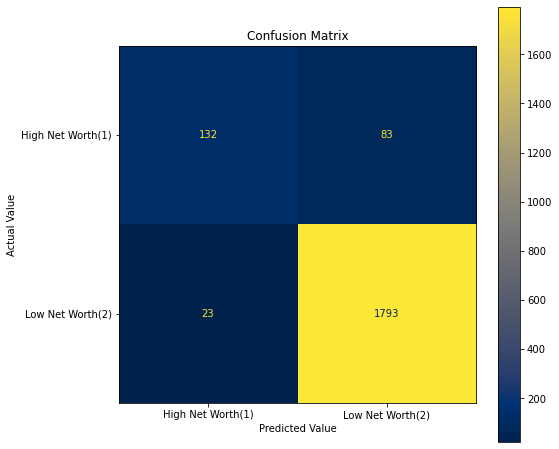

In [108]:
#For checking the correct and incorrect values we are using confusion matrix.
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_test_pred_count,labels=logreg.classes_)   #instantiate confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=logreg.classes_)  #displaying confusion matrix
fig, ax = plt.subplots(figsize=(8,8))                                             #plotting confusion matrix

disp.plot(cmap='cividis', values_format='d', ax=ax)
ax.set_xlabel('Predicted Value');ax.set_ylabel('Actual Value');                  #setting labels
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['High Net Worth(1)', 'Low Net Worth(2)']); ax.yaxis.set_ticklabels(['High Net Worth(1)', 'Low Net Worth(2)']);


In [109]:
print('\n' 'Accuracy score for test validation data is:' '\n', accuracy_score(y_test,y_test_pred_count))  #accuracy score
print('\n' 'Precison score for test validation data is:' '\n', precision_score(y_test,y_test_pred_count)) #precision score     
print('\n''Recall score for test validation data is:''\n',  recall_score(y_test,y_test_pred_count))      #Recall score
print('\n''F1 score for test validation data is :''\n', f1_score(y_test,y_test_pred_count))              #F1 score



Accuracy score for test validation data is:
 0.947808961102905

Precison score for test validation data is:
 0.8516129032258064

Recall score for test validation data is:
 0.6139534883720931

F1 score for test validation data is :
 0.7135135135135136


In [110]:
train_report = classification_report(y_train, y_train_pred_count)
test_report = classification_report(y_test, y_test_pred_count)
print('                    Training Data Report          ')
print(train_report)
print('                    Test Validation Data Report           ')
print(test_report)


                    Training Data Report          
              precision    recall  f1-score   support

           1       0.85      0.63      0.72       645
           2       0.96      0.99      0.97      5448

    accuracy                           0.95      6093
   macro avg       0.90      0.81      0.85      6093
weighted avg       0.95      0.95      0.95      6093

                    Test Validation Data Report           
              precision    recall  f1-score   support

           1       0.85      0.61      0.71       215
           2       0.96      0.99      0.97      1816

    accuracy                           0.95      2031
   macro avg       0.90      0.80      0.84      2031
weighted avg       0.94      0.95      0.94      2031



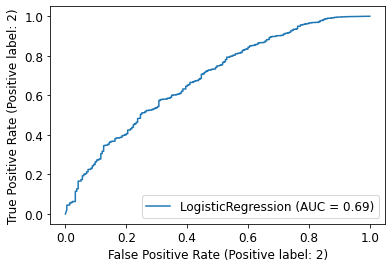

In [134]:
 # we are using ROC curve to evaluate classifier output quality.
 #ROC curves typically feature true positive rate on the Y axis, and false positive rate on the X axis. This means that the top left corner of the plot is the “ideal” point - a false positive rate of zero, and a true positive rate of one. This is not very realistic, but it does mean that a larger area under the curve (AUC) is usually better.


roc_disp= plot_roc_curve(logreg, X_test, y_test)


In [ ]:
# Applying logistic regression on test data

import sys
np.set_printoptions(threshold=None)
y_test_pred = logreg.predict(test_finalX)             #fitting the model with the data
y_test_pred
print(y_test_pred.shape)                            
print(y_test_pred)
lownetworthcount=0
highnetworthcount=0
for pred in y_test_pred:
  if pred ==1:
    lownetworthcount= lownetworthcount+1
  else:
    highnetworthcount= highnetworthcount+1
    
    
    print ("Low Net worth Count", lownetworthcount)

    print ("High Net worth Count", highnetworthcount)

In [ ]:
#Writing the ouptut of the predection in CSV file
output = pd.DataFrame({'REF_NO': test.index,'Revenue_Grid': y_test_pred})   #CSV file includes only 2 columns REF_NO, and revenue_grid
output.to_csv('customerclassification1.csv', index=False, header=False)


### CONCLUSION

- Logistic regression was successfully applied to the model, the **F1-score** of the model was **0.95**


